<h2> Click on the Runtime tab and click on Run All. It will take approximately about 30 minutes to run all the cells in the notebook if you are using Google Colab

# <b>Abstract</b>

Beam Search is a search algorithm used in natural language processing and machine learning to generate sequences of text or make decisions. Beam Search has the ability to concurrently explore multiple potential paths or sequences.In essence, beam search helps generate text that's more coherent and contextually relevant by considering multiple possibilities and selecting the most promising ones as it progresses.

The primary objective of this study is to evaluate and contrast the response time and memory usage of output text generation when Beam Search is used versus using default search.

Our emphasis will be on two key domains :
1. Text generation
2. Machine translation

For text generation, we will employ three distinct models GPT-2, DistilGPT-2, and BART from the HuggingSpace Transformers library. Each model will be given some input texts and both Beam Search and default search will be compared for text generation and the response time, as well as the memory usage will be recorded and compared.

For machine translation, MarianMT, a machine translation framework is used for the translation. We will be translating text from English to three different languages, French, Bahasa Indonesia and Chinese. Each language will be translated using both Beam search and default search and the response time, as well as the memory usage will be recorded and compared.

We will do three tests of using beam search for both text generation and machine learning. Specifically, the experiment will encompass three distinct scenarios utilizing 2, 7, and 25 beams, respectively to make the correlation between an increased number of beams and its consequential impact on both memory utilization and processing time

# <b>Methodology</b>

## <h3><b>Methodology for Text Generation</b><h3>

In this comparative analysis of text generation performance, three distinct models, GPT-2, DistilGPT-2 and BART have been selected to generate responses to both a creative and scientific input prompt.

The inclusion of both creative and scientific prompts in our evaluation serves the purpose of assessing whether it takes more time or memory based on the nature of the input prompt.

<b>Creative input prompt = "Hello, my dog is cute and"

Scientific input prompt = "In the world of Artificial Intelligence,"</b>

To ensure a fair assessment, a consistent maximum length of 100 tokens has been set for all input sequences. The Python time module is used for recording of the response time while the python memory-profiler module is used for recording the memory usage.

To comprehensively evaluate the performance of each model, four distinct tests have been conducted per model. These tests involve varying the number of beams utilized during the generation process, specifically employing default search, 2 beams, 7 beams, and 25 beams search. The reason for using increasing number of beam search is to investigate potential variations in the quality of the generated text, as well as make comparisons of the response time and memory usage

The expected output for both creative and scientific input prompts is the generation of coherent and extended sentences. The objective is to obtain responses that seamlessly continue and form a logical and contextually relevant narrative.

## <h3><b>Methodology for Machine Translation</b><h3>

In this comparative analysis of text translation performance, three distinct languages —French, Bahasa Indonesia, and Chinese—have been chosen to assess variations in response time and memory usage during the translation of English input prompts into each respective language.

Each language will translate the following input prompt into their own respective languages :

<b>"Computers have revolutionized the way we live and work.
The first electronic computer, ENIAC, was massive, weighing nearly 30 tons.
Today's computers are exponentially smaller and more powerful. Moore's Law, formulated by Gordon Moore,
predicted the doubling of transistors on a microchip every two years, driving rapid advancements.
The binary system, the fundamental language of computers, uses 0s and 1s to represent information."</b>

Each language will undergo four separate tests, employing beam search with widths of 2, 7,25 and default search (greedy algorithm). The reason for using increasing number of beam search is to investigate potential variations in the quality of the translated text, as well as make comparisons of the response times and memory usages

The response time of each translation will be facilitated by the Python time module and the memory usage will be facilitated by the Python memory-profiler module

# <b>Install Necessary Libraries</b>


In [70]:
!pip install transformers
!pip install SentencePiece
!pip install memory-profiler

<h3><b>Check Initial available memory</b><h3>

In [71]:
import psutil

# Get available memory in bytes
available_memory = psutil.virtual_memory().available

# Convert bytes to megabytes for readability
available_memory_mb = available_memory / (1024 ** 2)

print(f"Initial Available Memory: {available_memory_mb:.2f} MB")

Initial Available Memory: 8454.47 MB


# <b>Text Generation (Creative input prompt)</b>

## <h3><b>Text Generation with GPT-2 (Creative input prompt)</b><h3>

<h3><b>Define the model and prompt</b><h3>

In [72]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

input_text = "Hello, my dog is cute and"
input_ids = tokenizer(input_text, return_tensors="pt").input_ids

<h3><b>Text generation with GPT-2 using two beams (creative)</b><h3>

In [73]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

# Function for text generation with two beam search
def generate_text_gpt2_twoBeam():
    output = model.generate(input_ids, max_length=100, num_beams=2,no_repeat_ngram_size=2,early_stopping=True)
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text

# Testing for text generation using gpt2 model with two beam
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_gpt2_twoBeam = generate_text_gpt2_twoBeam()
end_time = time.time()
response_time_gpt2_twoBeam = end_time - start_time
# Measure memory usage
memory_used_gpt2_twoBeam = memory_usage(generate_text_gpt2_twoBeam)

# Print results for text generation with gpt2 model using two beam
print("Generated Text GPT-2 with Beam Search using two beam (creative):", generated_text_gpt2_twoBeam)
print(f"Response Time: {response_time_gpt2_twoBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_gpt2_twoBeam):.2f} MB")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text GPT-2 with Beam Search using two beam (creative): Hello, my dog is cute and I love him. I'm not sure if he's a good dog, but I think he has a lot of personality. He's very outgoing and he loves to play with his friends.

"I'm a big fan of his, and it's nice to have him around. It's been a long time since I've had a dog that I didn't like, so I just wanted to give him a chance to grow up and have a happy life
Response Time: 21.18 seconds
Memory Usage: 3503.12 MB


<h3><b>Text generation with GPT-2 using seven beams (creative)</b><h3>

In [74]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

# Function for text generation with seven beam search
def generate_text_gpt2_sevenBeam():
    output = model.generate(input_ids, max_length=100, num_beams=7,no_repeat_ngram_size=2, early_stopping=True)
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text

# Testing for text generation using gpt2 model with seven beams
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_gpt2_sevenBeam = generate_text_gpt2_sevenBeam()
end_time = time.time()
response_time_gpt2_sevenBeam = end_time - start_time
# Measure memory usage
memory_used_gpt2_sevenBeam = memory_usage(generate_text_gpt2_sevenBeam)

# Print results for text generation with gpt2 model using seven beam
print("Generated Text GPT-2 with Beam Search using seven beams (creative):", generated_text_gpt2_sevenBeam)
print(f"Response Time: {response_time_gpt2_sevenBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_gpt2_sevenBeam):.2f} MB")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text GPT-2 with Beam Search using seven beams (creative): Hello, my dog is cute and I love him so much. I'm so happy to have him back.

Thank you for taking the time out of your busy schedule to let me know what you think of my blog. It's been a long time coming, but I hope you enjoy it as much as I do.
Response Time: 20.99 seconds
Memory Usage: 3503.24 MB


<h3><b>Text generation with GPT-2 using twenty-five beams (creative)</b><h3>

In [75]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

# Function for text generation with twenty-five beam search
def generate_text_gpt2_twentyFiveBeam():
    output = model.generate(input_ids, max_length=100, num_beams=25,no_repeat_ngram_size=2, early_stopping=True)
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text

# Testing for text generation using gpt2 model with twenty-five beams
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_gpt2_twentyFiveBeam = generate_text_gpt2_twentyFiveBeam()
end_time = time.time()
response_time_gpt2_twentyFiveBeam = end_time - start_time
# Measure memory usage
memory_used_gpt2_twentyFiveBeam = memory_usage(generate_text_gpt2_twentyFiveBeam)

# Print results for text generation with gpt2 model using twenty-five beam
print("Generated Text GPT-2 with Beam Search using twenty-five beams (creative):", generated_text_gpt2_twentyFiveBeam)
print(f"Response Time: {response_time_gpt2_twentyFiveBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_gpt2_twentyFiveBeam):.2f} MB")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text GPT-2 with Beam Search using twenty-five beams (creative): Hello, my dog is cute and I can't wait to see what she has in store for me in the future.

Thank you for reading. Please take a moment to follow me on Twitter – @lastwordBkerr, or find her on Facebook.


Interested in writing for LastWordOnSports? If so, check out our "Join Our Team" page to find out how.
Response Time: 27.78 seconds
Memory Usage: 3503.24 MB


<h3><b>Text generation with GPT-2 using normal search (creative)</b><h3>

In [76]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

# Define the model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Input text
input_text = "Hello, my dog is cute and"

# Tokenize the input text
input_ids = tokenizer.encode(input_text, return_tensors="pt")

def generate_text_gpt2_normalSearch():
    output = model.generate(input_ids,no_repeat_ngram_size=2,max_length=100)
    generated_text_normal = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text_normal

# Testing for text generation using gpt2 model with normal search
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_gpt2_normalSearch = generate_text_gpt2_normalSearch()
end_time = time.time()
response_time_gpt2_normalSearch = end_time - start_time
# Measure memory usage
memory_used_gpt2_normalSearch = memory_usage(generate_text_gpt2_normalSearch)

# Print results for text generation with gpt2 model using normal search
print("Generated Text GPT-2 using normal search (creative):", generated_text_gpt2_normalSearch)
print(f"Response Time: {response_time_gpt2_normalSearch:.2f} seconds")
print(f"Memory Usage: {max(memory_used_gpt2_normalSearch):.2f} MB")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text GPT-2 using normal search (creative): Hello, my dog is cute and I love him. I'm not sure if he's a good dog, but I think he is a great dog. He's very friendly and he loves to play with me.

I'm a big fan of the dog and his personality. His personality is very positive and very happy. It's nice to see him in a situation where he can be a little bit more relaxed. The dog has a very good sense of humor and is always smiling. When
Response Time: 10.15 seconds
Memory Usage: 3497.43 MB


## <h3><b>Text Generation with DistilGPT-2 (Creative input prompt)</b><h3>

<h3><b>Text generation with DistilGPT-2 using two beams (creative)</b><h3>

In [77]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

# Load the pre-trained DistilGPT-2 model and tokenizer
model_name = "distilgpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Input text
input_text = "Hello, my dog is cute and"

# Tokenize the input text
input_ids = tokenizer.encode(input_text, return_tensors="pt")

# Function for text generation with two beam search
def generate_text_distilgpt2_twoBeam():
    output = model.generate(
    input_ids,
    max_length=100,
    num_beams=2,  # Number of beams for beam search
    length_penalty=2.0,
    no_repeat_ngram_size=2,
    early_stopping=True
    )
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text


# Testing for text generation using DistilGPT-2 model model with two beams
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_distilgpt2_twoBeam = generate_text_distilgpt2_twoBeam()
end_time = time.time()
response_time_distilgpt2_twoBeam = end_time - start_time
# Measure memory usage
memory_used_distilgpt2_twoBeam = memory_usage(generate_text_distilgpt2_twoBeam)

# Print results for text generation with distilgpt2 model using two beam search
print("Generated Text DistilGPT-2 with Beam Search using two beams (creative):", generated_text_distilgpt2_twoBeam)
print(f"Response Time: {response_time_distilgpt2_twoBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_distilgpt2_twoBeam):.2f} MB")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text DistilGPT-2 with Beam Search using two beams (creative): Hello, my dog is cute and I love him.

I love her and she loves me too. She is so cute, I can't wait to see her again.
Response Time: 2.96 seconds
Memory Usage: 3496.43 MB


<h3><b>Text generation with DistilGPT-2 using seven beams (creative)</b><h3>

In [78]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

# Load the pre-trained DistilGPT-2 model and tokenizer
model_name = "distilgpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Input text
input_text = "Hello, my dog is cute and"

# Tokenize the input text
input_ids = tokenizer.encode(input_text, return_tensors="pt")

# Function for text generation with seven beam search
def generate_text_distilgpt2_sevenBeam():
    output = model.generate(
    input_ids,
    max_length=100,
    num_beams=7,  # Number of beams for beam search
    length_penalty=2.0,
    no_repeat_ngram_size=2,
    early_stopping=True
    )
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text


# Testing for text generation using DistilGPT-2 model with seven beams
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_distilgpt2_sevenBeam = generate_text_distilgpt2_sevenBeam()
end_time = time.time()
response_time_distilgpt2_sevenBeam = end_time - start_time
# Measure memory usage
memory_used_distilgpt2_sevenBeam = memory_usage(generate_text_distilgpt2_sevenBeam)

# Print results for text generation with gpt2 model using normal search
print("Generated Text DistilGPT-2 with Beam Search using seven beams (creative):", generated_text_distilgpt2_sevenBeam)
print(f"Response Time: {response_time_distilgpt2_sevenBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_distilgpt2_sevenBeam):.2f} MB")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text DistilGPT-2 with Beam Search using seven beams (creative): Hello, my dog is cute and I love to play with it, but I don't know what to do about it. I'm not sure if I'll be able to make it to the next level, or if it will take me a long time to get to that level.

If you have any questions, please let me know in the comments.
Response Time: 7.36 seconds
Memory Usage: 3498.45 MB


<h3><b>Text generation with DistilGPT-2 using twenty-five beams (creative)</b><h3>

In [79]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

# Load the pre-trained DistilGPT-2 model and tokenizer
model_name = "distilgpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Input text
input_text = "Hello, my dog is cute and"

# Tokenize the input text
input_ids = tokenizer.encode(input_text, return_tensors="pt")

# Function for text generation with twenty-five beam search
def generate_text_distilgpt2_twentyFiveBeam():
    output = model.generate(
    input_ids,
    max_length=100,
    num_beams=25,  # Number of beams for beam search
    length_penalty=2.0,
    no_repeat_ngram_size=2,
    early_stopping=True
    )
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text


# Testing for text generation using DistilGPT-2 model model with twenty five beams
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_distilgpt2_twentyFiveBeam = generate_text_distilgpt2_twentyFiveBeam()
end_time = time.time()
response_time_distilgpt2_twentyFiveBeam = end_time - start_time
# Measure memory usage
memory_used_distilgpt2_twentyFiveBeam = memory_usage(generate_text_distilgpt2_twentyFiveBeam)

# Print results for text generation with DistilGPT-2 model using twenty-five beam search
print("Generated Text DistilGPT-2 with Beam Search using twenty-five beams (creative):", generated_text_distilgpt2_twentyFiveBeam)
print(f"Response Time: {response_time_distilgpt2_twentyFiveBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_distilgpt2_twentyFiveBeam):.2f} MB")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text DistilGPT-2 with Beam Search using twenty-five beams (creative): Hello, my dog is cute and I love to play with it, but I don't know what to do about it. I'm not sure if I'll be able to give it a try.

If you have any questions, please let me know in the comments below.
Response Time: 9.68 seconds
Memory Usage: 3498.43 MB


<h3><b>Text generation with DistilGPT-2 using normal search (creative)</b><h3>

In [80]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

# Define the model and tokenizer
model_name = "distilgpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Input text
input_text = "Hello, my dog is cute and"

# Tokenize the input text
input_ids = tokenizer.encode(input_text, return_tensors="pt")

def generate_text_distilgpt2_normalSearch():
    output = model.generate(input_ids,no_repeat_ngram_size=2,max_length=100)
    generated_text_normal = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text_normal

# Testing for text generation using distilgpt2 model with normal search
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_distilgpt2_normalSearch = generate_text_distilgpt2_normalSearch()
end_time = time.time()
response_time_distilgpt2_normalSearch = end_time - start_time
# Measure memory usage
memory_used_distilgpt2_normalSearch = memory_usage(generate_text_distilgpt2_normalSearch)

# Print results for text generation with distilgpt2 model using normal search
print("Generated Text distilgpt2 using normal search (creative):", generated_text_distilgpt2_normalSearch)
print(f"Response Time: {response_time_distilgpt2_normalSearch:.2f} seconds")
print(f"Memory Usage: {max(memory_used_distilgpt2_normalSearch):.2f} MB")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text distilgpt2 using normal search (creative): Hello, my dog is cute and I love him. I'm so happy to have him, and he's so cute.

I love you.
Response Time: 1.47 seconds
Memory Usage: 3501.45 MB


##  <h3><b>Text Generation with BART (Creative input prompt)</b><h3>

<h3><b>Text generation with BART using two beams (creative)</b><h3>

In [81]:
import time
from transformers import BartTokenizer, BartForConditionalGeneration
from memory_profiler import memory_usage

# Load BART model and tokenizer
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")

# Set the prompt for text generation
prompt = "Hello, my dog is cute and"

# Tokenize the input text
input_ids = tokenizer.encode(prompt, return_tensors="pt", add_special_tokens=True)

# Function for text generation with two beam search
def generate_text_bart_twoBeam():
  # Generate text using beam search
    output = model.generate(
        input_ids,
        max_length=100,
        num_beams=2,
        no_repeat_ngram_size=2,
        early_stopping=True,
    )
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text


# Testing for text generation using BART model with two beams
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_bart_twoBeam = generate_text_bart_twoBeam()
end_time = time.time()
response_time_bart_twoBeam = end_time - start_time
# Measure memory usage
memory_used_bart_twoBeam = memory_usage(generate_text_bart_twoBeam)

# Print results for text generation with BART model using five beam
print("Generated Text BART with Beam Search using two beams (creative):", generated_text_bart_twoBeam)
print(f"Response Time: {response_time_bart_twoBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_bart_twoBeam):.2f} MB")

Generated Text BART with Beam Search using two beams (creative): Hello, my dog is cute and cute. Hello, I have a dog that is also cute, and a little bit weird. hello, My dog, is adorable and weird and kind of weird, too. Hey, it's a puppy. What do you say to that?
Response Time: 14.34 seconds
Memory Usage: 4795.48 MB


<h3><b>Text generation with BART using seven beams (creative)</b><h3>

In [82]:
import time
from transformers import BartTokenizer, BartForConditionalGeneration
from memory_profiler import memory_usage

# Load BART model and tokenizer
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")

# Set the prompt for text generation
prompt = "Hello, my dog is cute and"

# Tokenize the input text
input_ids = tokenizer.encode(prompt, return_tensors="pt", add_special_tokens=True)

# Function for text generation with two beam search
def generate_text_bart_sevenBeam():
  # Generate text using beam search
    output = model.generate(
        input_ids,
        max_length=100,
        num_beams=7,
        no_repeat_ngram_size=2,
        early_stopping=True,
    )
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text


# Testing for text generation using BART model with seven beams
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_bart_sevenBeam = generate_text_bart_sevenBeam()
end_time = time.time()
response_time_bart_sevenBeam = end_time - start_time
# Measure memory usage
memory_used_bart_sevenBeam = memory_usage(generate_text_bart_sevenBeam)

# Print results for text generation with BART model using seven beam
print("Generated Text BART with Beam Search using seven beams (creative):", generated_text_bart_sevenBeam)
print(f"Response Time: {response_time_bart_sevenBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_bart_sevenBeam):.2f} MB")

Generated Text BART with Beam Search using seven beams (creative): Hello, my dog is cute and I love him. Here's how you can get your own dog. Visit CNN.com/soulmatestories to see more videos from CNN's "Soulmatistry" series. Follow us on Twitter @CNNOpinion and @MailOnlinePics.
Response Time: 19.40 seconds
Memory Usage: 6046.93 MB


<h3><b>Text generation with BART using twenty-five beams (creative)</b><h3>

In [83]:
import time
from transformers import BartTokenizer, BartForConditionalGeneration
from memory_profiler import memory_usage

# Load BART model and tokenizer
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")

# Set the prompt for text generation
prompt = "Hello, my dog is cute and"

# Tokenize the input text
input_ids = tokenizer.encode(prompt, return_tensors="pt", add_special_tokens=True)

# Function for text generation with twenty-five beam search
def generate_text_bart_twentyFiveBeam():
  # Generate text using beam search
    output = model.generate(
        input_ids,
        max_length=100,
        num_beams=25,
        no_repeat_ngram_size=2,
        early_stopping=True,
    )
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text


# Testing for text generation using BART model with twenty Five beams
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_bart_twentyFiveBeam = generate_text_bart_twentyFiveBeam()
end_time = time.time()
response_time_bart_twentyFiveBeam = end_time - start_time
# Measure memory usage
memory_used_bart_twentyFiveBeam = memory_usage(generate_text_bart_twentyFiveBeam)

# Print results for text generation with BART model using twenty five beam
print("Generated Text BART with Beam Search using twentyFive beams (creative):", generated_text_bart_twentyFiveBeam)
print(f"Response Time: {response_time_bart_twentyFiveBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_bart_twentyFiveBeam):.2f} MB")

Generated Text BART with Beam Search using twentyFive beams (creative): Hello, my dog is cute and I love him. Here's how you can get your own dog. Have you ever had a dog? Share your story with CNN iReport. Send photos and videos of your dog to jennifer.smith@dailymail.co.uk.
Response Time: 31.53 seconds
Memory Usage: 5864.61 MB


<h3><b>Text generation with BART using normal search (creative)</b><h3>

In [84]:
import time
from transformers import BartTokenizer, BartForConditionalGeneration
from memory_profiler import memory_usage

# Load BART model and tokenizer
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")

# Set the prompt for text generation
prompt = "Hello, my dog is cute and"

# Tokenize the input text
input_ids = tokenizer.encode(prompt, return_tensors="pt", add_special_tokens=True)

# Function for text generation with normal beam search
def generate_text_bart_normalSearch():
  # Generate text using normal search
    output = model.generate(
        input_ids,
        max_length=100,
        num_beams=1, # Set to 1 for greedy (normal) search
        no_repeat_ngram_size=2
    )
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text


# Testing for text generation using BART model with normal search
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_bart_normalSearch = generate_text_bart_normalSearch()
end_time = time.time()
response_time_bart_normalSearch = end_time - start_time
# Measure memory usage
memory_used_bart_normalSearch = memory_usage(generate_text_bart_normalSearch)

# Print results for text generation with gpt2 model using twenty five beam
print("Generated Text BART with Beam Search using normal search (creative):", generated_text_bart_normalSearch)
print(f"Response Time: {response_time_bart_normalSearch:.2f} seconds")
print(f"Memory Usage: {max(memory_used_bart_normalSearch):.2f} MB")

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:418: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:437: UserWarning: `num_beams` is set to 1. However, `length_penalty` is set to `2.0` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `length_penalty`.
  warnings.warn(


Generated Text BART with Beam Search using normal search (creative): Hello, my dog is cute and cute. Hello, I'm a dog.Hello. My dog's cute, cute! Hello. I’m adog. hello, your dog”s cute,. cute? Hello! Your dog, is adorable. Please.
Response Time: 7.26 seconds
Memory Usage: 6051.31 MB


# <b>Text Generation (Scientific input prompt)</b>

##<h3><b>Text Generation with GPT-2 (Scientific input prompt)</b><h3>

<h3><b>Define the model and prompt</b><h3>

In [85]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

input_text_scientific = "In the world of Artificial Intelligence,"
input_ids_scientific = tokenizer(input_text_scientific, return_tensors="pt").input_ids

<h3><b>Text generation with GPT-2 using two beams (scientific)</b><h3>

In [86]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

# Function for text generation with two beam search
def generate_text_gpt2_twoBeam_scientific():
    output = model.generate(input_ids_scientific, max_length=100, num_beams=2,no_repeat_ngram_size=2,early_stopping=True)
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text

# Testing for text generation using gpt2 model with two beam
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_gpt2_twoBeam_scientific = generate_text_gpt2_twoBeam_scientific()
end_time = time.time()
response_time_gpt2_twoBeam_scientific = end_time - start_time
# Measure memory usage
memory_used_gpt2_twoBeam_scientific = memory_usage(generate_text_gpt2_twoBeam_scientific)

# Print results for text generation with gpt2 model using two beam
print("Generated Text (GPT-2 with Beam Search using two beam (scientific):", generated_text_gpt2_twoBeam_scientific)
print(f"Response Time: {response_time_gpt2_twoBeam_scientific:.2f} seconds")
print(f"Memory Usage: {max(memory_used_gpt2_twoBeam_scientific):.2f} MB")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text (GPT-2 with Beam Search using two beam (scientific): In the world of Artificial Intelligence, there is no such thing as a "good" AI. It is simply a tool that can be used to improve the quality of life of its users.

In this article, we will look at how to create a good AI that will be able to do things that humans can't do. We will also discuss how we can use AI to help us improve our lives. In the future, I hope you will join us on this journey.
Response Time: 13.61 seconds
Memory Usage: 3503.39 MB


<h3><b>Text generation with GPT-2 using seven beams (scientific)</b><h3>

In [87]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

# Function for text generation with two beam search
def generate_text_gpt2_sevenBeam_scientific():
    output = model.generate(input_ids_scientific, max_length=100, num_beams=7,no_repeat_ngram_size=2,early_stopping=True)
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text

# Testing for text generation using gpt2 model with seven beam
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_gpt2_sevenBeam_scientific = generate_text_gpt2_sevenBeam_scientific()
end_time = time.time()
response_time_gpt2_sevenBeam_scientific = end_time - start_time
# Measure memory usage
memory_used_gpt2_sevenBeam_scientific = memory_usage(generate_text_gpt2_sevenBeam_scientific)

# Print results for text generation with gpt2 model using seven beam
print("Generated Text (GPT-2 with Beam Search using seven beam (scientific):", generated_text_gpt2_sevenBeam_scientific)
print(f"Response Time: {response_time_gpt2_sevenBeam_scientific:.2f} seconds")
print(f"Memory Usage: {max(memory_used_gpt2_sevenBeam_scientific):.2f} MB")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text (GPT-2 with Beam Search using seven beam (scientific): In the world of Artificial Intelligence, there is no such thing as a "good" AI. There is only a certain amount of good AI that is good enough for us to be able to do what we want with it.

The problem is that we don't know how good the AI will be. We can't predict what will happen in the future, but we can predict how well it will perform. That means we need to know what kind of AI is going to come out of the
Response Time: 17.44 seconds
Memory Usage: 3503.41 MB


<h3><b>Text generation with GPT-2 using twenty-five beams (scientific)</b><h3>

In [88]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

# Function for text generation with twenty five beam search
def generate_text_gpt2_twentyFiveBeam_scientific():
    output = model.generate(input_ids_scientific, max_length=100, num_beams=25,no_repeat_ngram_size=2,early_stopping=True)
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text

# Testing for text generation using gpt2 model with twenty five beam
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_gpt2_twentyFiveBeam_scientific = generate_text_gpt2_twentyFiveBeam_scientific()
end_time = time.time()
response_time_gpt2_twentyFiveBeam_scientific = end_time - start_time
# Measure memory usage
memory_used_gpt2_twentyFiveBeam_scientific = memory_usage(generate_text_gpt2_twentyFiveBeam_scientific)

# Print results for text generation with gpt2 model using twenty Five beam
print("Generated Text (GPT-2 with Beam Search using twenty Five beam (scientific):", generated_text_gpt2_twentyFiveBeam_scientific)
print(f"Response Time: {response_time_gpt2_twentyFiveBeam_scientific:.2f} seconds")
print(f"Memory Usage: {max(memory_used_gpt2_twentyFiveBeam_scientific):.2f} MB")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text (GPT-2 with Beam Search using twenty Five beam (scientific): In the world of Artificial Intelligence, there is no such thing as artificial intelligence. In fact, the term "AI" is often used as a synonym for "intelligent" or "advanced" AI.

In this article, we will look at some of the ways in which AI can be used to improve the quality of our lives. We will also discuss how we can use AI to change the way we live, work, and interact with our friends and family, as well as
Response Time: 32.80 seconds
Memory Usage: 3503.41 MB


<h3><b>Text generation with GPT-2 using normal search (scientific)</b><h3>

In [89]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

# Define the model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Input text
input_text_scientific = "In the world of Artificial Intelligence,"

# Tokenize the input text
input_ids_scientific = tokenizer.encode(input_text_scientific, return_tensors="pt")

def generate_text_gpt2_normalSearch_scientific():
    output = model.generate(input_ids_scientific,no_repeat_ngram_size=2,max_length=100)
    generated_text_normal = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text_normal

# Testing for text generation using gpt2 model with normal search
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_gpt2_normalSearch_scientific = generate_text_gpt2_normalSearch_scientific()
end_time = time.time()
response_time_gpt2_normalSearch_scientific = end_time - start_time
# Measure memory usage
memory_used_gpt2_normalSearch_scientific = memory_usage(generate_text_gpt2_normalSearch_scientific)

# Print results for text generation with gpt2 model using normal search
print("Generated Text GPT-2 using normal search (scientific):", generated_text_gpt2_normalSearch_scientific)
print(f"Response Time: {response_time_gpt2_normalSearch_scientific:.2f} seconds")
print(f"Memory Usage: {max(memory_used_gpt2_normalSearch_scientific):.2f} MB")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text GPT-2 using normal search (scientific): In the world of Artificial Intelligence, there are many different ways to think about it. Some are more abstract, some are deeper, and some have more concrete implications.

The first is that we can think of AI as a kind of "machine learning" system. It's a system that can learn from the human mind and learn to recognize and respond to human needs. The human brain is a machine that learns from a human's needs, but it can also learn and adapt to new situations.
Response Time: 7.08 seconds
Memory Usage: 3504.41 MB


## <h3><b>Text Generation with DistilGPT-2 (Scientific input prompt)</b><h3>

<h3><b>Text generation with DistilGPT-2 using two beams (scientific)</b><h3>

In [90]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

# Load the pre-trained DistilGPT-2 model and tokenizer
model_name = "distilgpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Input text
input_text_scientific = "In the world of Artificial Intelligence,"

# Tokenize the input text
input_ids_scientific = tokenizer.encode(input_text_scientific, return_tensors="pt")

# Function for text generation with two beam search
def generate_text_distilgpt2_twoBeam_scientific():
    output = model.generate(
    input_ids_scientific,
    max_length=100,
    num_beams=2,  # Number of beams for beam search
    length_penalty=2.0,
    no_repeat_ngram_size=2,
    early_stopping=True
    )
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text


# Testing for text generation using DistilGPT-2 model model with two beams
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_distilgpt2_twoBeam_scientific = generate_text_distilgpt2_twoBeam_scientific()
end_time = time.time()
response_time_distilgpt2_twoBeam_scientific = end_time - start_time
# Measure memory usage
memory_used_distilgpt2_twoBeam_scientific = memory_usage(generate_text_distilgpt2_twoBeam_scientific)

# Print results for text generation with DistilGPT-2 model using two beam search
print("Generated Text (DistilGPT-2 with Beam Search using two beams (scientific):", generated_text_distilgpt2_twoBeam_scientific)
print(f"Response Time: {response_time_distilgpt2_twoBeam_scientific:.2f} seconds")
print(f"Memory Usage: {max(memory_used_distilgpt2_twoBeam_scientific):.2f} MB")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text (DistilGPT-2 with Beam Search using two beams (scientific): In the world of Artificial Intelligence, we have to understand that we are not just machines, but also machines. We are also human beings.

In this article, I will explain how artificial intelligence can be used to solve problems in the real world, and how we can solve them in a way that is not possible in our current world. I hope that you will find out more about this topic in this post.
Response Time: 7.08 seconds
Memory Usage: 3503.44 MB


<h3><b>Text generation with DistilGPT-2 using seven beams (scientific)</b><h3>

In [91]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

# Load the pre-trained DistilGPT-2 model and tokenizer
model_name = "distilgpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Input text
input_text_scientific = "In the world of Artificial Intelligence,"

# Tokenize the input text
input_ids_scientific = tokenizer.encode(input_text_scientific, return_tensors="pt")

# Function for text generation with seven beam search
def generate_text_distilgpt2_sevenBeam_scientific():
    output = model.generate(
    input_ids_scientific,
    max_length=100,
    num_beams=7,  # Number of beams for beam search
    length_penalty=2.0,
    no_repeat_ngram_size=2,
    early_stopping=True
    )
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text


# Testing for text generation using DistilGPT-2 model model with seven beams
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_distilgpt2_sevenBeam_scientific = generate_text_distilgpt2_sevenBeam_scientific()
end_time = time.time()
response_time_distilgpt2_sevenBeam_scientific = end_time - start_time
# Measure memory usage
memory_used_distilgpt2_sevenBeam_scientific = memory_usage(generate_text_distilgpt2_sevenBeam_scientific)

# Print results for text generation with DistilGPT-2 model using seven beam search
print("Generated Text (DistilGPT-2 with Beam Search using seven beams (scientific):", generated_text_distilgpt2_sevenBeam_scientific)
print(f"Response Time: {response_time_distilgpt2_sevenBeam_scientific:.2f} seconds")
print(f"Memory Usage: {max(memory_used_distilgpt2_sevenBeam_scientific):.2f} MB")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text (DistilGPT-2 with Beam Search using seven beams (scientific): In the world of Artificial Intelligence, it’s hard not to see how the future of artificial intelligence is going to be shaped by the rise of AI. In the past few years, there has been an increase in the number of people who are interested in machine learning, but there is still a lot of work to do.

This article was originally published on The Conversation. Read the original article and follow us on Twitter @theatlantic.
Response Time: 10.58 seconds
Memory Usage: 3504.42 MB


<h3><b>Text generation with DistilGPT-2 using twenty-five beams (scientific)</b><h3>

In [92]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

# Load the pre-trained DistilGPT-2 model and tokenizer
model_name = "distilgpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Input text
input_text_scientific = "In the world of Artificial Intelligence,"

# Tokenize the input text
input_ids_scientific = tokenizer.encode(input_text_scientific, return_tensors="pt")

# Function for text generation with twenty Five beam search
def generate_text_distilgpt2_twentyFiveBeam_scientific():
    output = model.generate(
    input_ids_scientific,
    max_length=100,
    num_beams=25,  # Number of beams for beam search
    length_penalty=2.0,
    no_repeat_ngram_size=2,
    early_stopping=True
    )
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text


# Testing for text generation using DistilGPT-2 model model with twenty Five beams
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_distilgpt2_twentyFiveBeam_scientific = generate_text_distilgpt2_twentyFiveBeam_scientific()
end_time = time.time()
response_time_distilgpt2_twentyFiveBeam_scientific = end_time - start_time
# Measure memory usage
memory_used_distilgpt2_twentyFiveBeam_scientific = memory_usage(generate_text_distilgpt2_twentyFiveBeam_scientific)

# Print results for text generation with DistilGPT-2 model using twenty Five beam search
print("Generated Text (DistilGPT-2 with Beam Search using twenty Five beams (scientific):", generated_text_distilgpt2_twentyFiveBeam_scientific)
print(f"Response Time: {response_time_distilgpt2_twentyFiveBeam_scientific:.2f} seconds")
print(f"Memory Usage: {max(memory_used_distilgpt2_twentyFiveBeam_scientific):.2f} MB")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text (DistilGPT-2 with Beam Search using twenty Five beams (scientific): In the world of Artificial Intelligence, artificial intelligence (AI) is one of the most well-known fields of research in the field. In the past few years, there have been a number of major advances in AI, including the introduction of a new generation of machine learning algorithms that can be used to perform tasks in real-time, in-person, and in virtual reality (VR) environments. However, these advances have not yet been fully realized. For example, researchers at the University of California
Response Time: 20.31 seconds
Memory Usage: 3504.44 MB


<h3><b>Text generation with DistilGPT-2 using normal search (scientific)</b><h3>

In [93]:
import time
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from memory_profiler import memory_usage

# Define the model and tokenizer
model_name = "distilgpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Input text
input_text_scientific = "In the world of Artificial Intelligence,"

# Tokenize the input text
input_ids_scientific = tokenizer.encode(input_text_scientific, return_tensors="pt")

def generate_text_distilgpt2_normalSearch_scientific():
    output = model.generate(input_ids_scientific,no_repeat_ngram_size=2,max_length=100)
    generated_text_normal = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text_normal

# Testing for text generation using distilgpt2 model with normal search
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_distilgpt2_normalSearch_scientific = generate_text_distilgpt2_normalSearch_scientific()
end_time = time.time()
response_time_distilgpt2_normalSearch_scientific = end_time - start_time
# Measure memory usage
memory_used_distilgpt2_normalSearch_scientific = memory_usage(generate_text_distilgpt2_normalSearch_scientific)

# Print results for text generation with gpt2 model using normal search
print("Generated Text (distilgpt2 using normal search):", generated_text_distilgpt2_normalSearch_scientific)
print(f"Response Time: {response_time_distilgpt2_normalSearch_scientific:.2f} seconds")
print(f"Memory Usage: {max(memory_used_distilgpt2_normalSearch_scientific):.2f} MB")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text (distilgpt2 using normal search): In the world of Artificial Intelligence, we have to understand that the human brain is not a machine. It is a computer.

The human mind is the brain. The brain consists of a brain that is composed of neurons that are connected to the body. This is called the "brain."
In this way, the mind can be thought of as a "machine." The human body is an organism. In the case of the computer, it is thought that it has a mind. That is
Response Time: 4.95 seconds
Memory Usage: 3504.45 MB


## <h3><b>Text Generation with BART (Scientific input prompt)</b><h3>

<h3><b>Text generation with BART using two beams (scientific)</b><h3>

In [94]:
import time
from transformers import BartTokenizer, BartForConditionalGeneration
from memory_profiler import memory_usage

# Load BART model and tokenizer
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")

# Set the prompt for text generation
prompt = "In the world of Artificial Intelligence,"

# Tokenize the input text
input_ids_scientific = tokenizer.encode(prompt, return_tensors="pt", add_special_tokens=True)

# Function for text generation with two beam search
def generate_text_bart_twoBeam_scientific():
  # Generate text using beam search
    output = model.generate(
        input_ids_scientific,
        max_length=100,
        num_beams=2,
        no_repeat_ngram_size=2,
        early_stopping=True,
    )
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text


# Testing for text generation using BART model with two beams
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_bart_twoBeam_scientific = generate_text_bart_twoBeam_scientific()
end_time = time.time()
response_time_bart_twoBeam_scientific = end_time - start_time
# Measure memory usage
memory_used_bart_twoBeam_scientific = memory_usage(generate_text_bart_twoBeam_scientific)

# Print results for text generation with gpt2 model using five beam
print("Generated Text (BART with Beam Search using two beams (scientific):", generated_text_bart_twoBeam_scientific)
print(f"Response Time: {response_time_bart_twoBeam_scientific:.2f} seconds")
print(f"Memory Usage: {max(memory_used_bart_twoBeam_scientific):.2f} MB")

Generated Text (BART with Beam Search using two beams (scientific): In the world of Artificial Intelligence, we look at the role of computers in the digital world. We also examine how they can be used to help people in real life and in their dreams. In this article, CNN looks at how computers can help humans in a variety of ways.
Response Time: 14.25 seconds
Memory Usage: 4780.36 MB


<h3><b>Text generation with BART using seven beams (scientific)</b><h3>

In [95]:
import time
from transformers import BartTokenizer, BartForConditionalGeneration
from memory_profiler import memory_usage

# Load BART model and tokenizer
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")

# Set the prompt for text generation
prompt = "In the world of Artificial Intelligence,"

# Tokenize the input text
input_ids_scientific = tokenizer.encode(prompt, return_tensors="pt", add_special_tokens=True)

# Function for text generation with seven beam search
def generate_text_bart_sevenBeam_scientific():
  # Generate text using beam search
    output = model.generate(
        input_ids_scientific,
        max_length=100,
        num_beams=7,
        no_repeat_ngram_size=2,
        early_stopping=True,
    )
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text


# Testing for text generation using BART model with seven beams
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_bart_sevenBeam_scientific = generate_text_bart_sevenBeam_scientific()
end_time = time.time()
response_time_bart_sevenBeam_scientific = end_time - start_time
# Measure memory usage
memory_used_bart_sevenBeam_scientific = memory_usage(generate_text_bart_sevenBeam_scientific)

# Print results for text generation with BART model using five beam
print("Generated Text (BART with Beam Search using seven beams (scientific):", generated_text_bart_sevenBeam_scientific)
print(f"Response Time: {response_time_bart_sevenBeam_scientific:.2f} seconds")
print(f"Memory Usage: {max(memory_used_bart_sevenBeam_scientific):.2f} MB")

Generated Text (BART with Beam Search using seven beams (scientific): In the world of Artificial Intelligence, we look at some of the biggest challenges ahead. This week we focus on the rise of artificial intelligence in the U.S. and its impact on jobs and the economy. We also examine the role of computers in society, and what the future holds.
Response Time: 18.30 seconds
Memory Usage: 6052.73 MB


<h3><b>Text generation with BART using twenty-five beams (scientific)</b><h3>

In [96]:
import time
from transformers import BartTokenizer, BartForConditionalGeneration
from memory_profiler import memory_usage

# Load BART model and tokenizer
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")

# Set the prompt for text generation
prompt = "In the world of Artificial Intelligence,"

# Tokenize the input text
input_ids_scientific = tokenizer.encode(prompt, return_tensors="pt", add_special_tokens=True)

# Function for text generation with twenty Five beam search
def generate_text_bart_twentyFiveBeam_scientific():
  # Generate text using beam search
    output = model.generate(
        input_ids_scientific,
        max_length=100,
        num_beams=25,
        no_repeat_ngram_size=2,
        early_stopping=True,
    )
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text


# Testing for text generation using BART model with twenty Five beams
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_bart_twentyFiveBeam_scientific = generate_text_bart_twentyFiveBeam_scientific()
end_time = time.time()
response_time_bart_twentyFiveBeam_scientific = end_time - start_time
# Measure memory usage
memory_used_bart_twentyFiveBeam_scientific = memory_usage(generate_text_bart_twentyFiveBeam_scientific)

# Print results for text generation with BART model using twenty Five beam
print("Generated Text (BART with Beam Search using twenty Five beams (scientific):", generated_text_bart_twentyFiveBeam_scientific)
print(f"Response Time: {response_time_bart_twentyFiveBeam_scientific:.2f} seconds")
print(f"Memory Usage: {max(memory_used_bart_twentyFiveBeam_scientific):.2f} MB")

Generated Text (BART with Beam Search using twenty Five beams (scientific): In the world of Artificial Intelligence, there is no such thing as a perfect algorithm. There is, however, an algorithm that can predict what a person will do in the future. For more, visit CNN.com/ArtificialIntelligence and follow us on Twitter @cnnartificialintelligence.
Response Time: 33.45 seconds
Memory Usage: 5861.05 MB


<h3><b>Text generation with BART using normal search (scientific)</b><h3>

In [97]:
import time
from transformers import BartTokenizer, BartForConditionalGeneration
from memory_profiler import memory_usage

# Load BART model and tokenizer
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")

# Set the prompt for text generation
prompt = "In the world of Artificial Intelligence,"

# Tokenize the input text
input_ids_scientific = tokenizer.encode(prompt, return_tensors="pt", add_special_tokens=True)

# Function for text generation with two beam search
def generate_text_bart_normalSearch_scientific():
  # Generate text using normal search
    output = model.generate(
        input_ids_scientific,
        max_length=100,
        num_beams=1, # Set to 1 for greedy (normal) search
        no_repeat_ngram_size=2
    )
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return generated_text


# Testing for text generation using BART model with normal search
# Measure response time
start_time = time.time()
# Generate text using beam search
generated_text_bart_normalSearch_scientific = generate_text_bart_normalSearch_scientific()
end_time = time.time()
response_time_bart_normalSearch_scientific = end_time - start_time
# Measure memory usage
memory_used_bart_normalSearch_scientific = memory_usage(generate_text_bart_normalSearch_scientific)

# Print results for text generation with BART model using normal search
print("Generated Text (BART with Beam Search using normal search):", generated_text_bart_normalSearch_scientific)
print(f"Response Time: {response_time_bart_normalSearch_scientific:.2f} seconds")
print(f"Memory Usage: {max(memory_used_bart_normalSearch_scientific):.2f} MB")

Generated Text (BART with Beam Search using normal search): In the world of Artificial Intelligence, we look at the role of computers. We also look into the ways in which they can be used to help people. And we also take a look back at how they were created. In this article, CNN looks at some of the key developments in the field of artificial intelligence.
Response Time: 8.80 seconds
Memory Usage: 6065.07 MB


# <b>Machine Translation</b>

## <h3><b>Machine Translation with MarianMT (French)</b><h3>

<h3><b>Languge Translation to French using two beams</b><h3>

In [98]:
import time
from transformers import MarianMTModel, MarianTokenizer
from memory_profiler import memory_usage

model_name = "Helsinki-NLP/opus-mt-en-fr"  # English to French translation
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

input_text = '''
Computers have revolutionized the way we live and work.
The first electronic computer, ENIAC, was massive, weighing nearly 30 tons.
Today's computers are exponentially smaller and more powerful. Moore's Law, formulated by Gordon Moore,
predicted the doubling of transistors on a microchip every two years, driving rapid advancements.
The binary system, the fundamental language of computers, uses 0s and 1s to represent information.
'''

input_ids = tokenizer(input_text, return_tensors="pt").input_ids

# Function for language translation to french using two beams search
def translate_text_MarianMTFrench_twoBeam():
    output = model.generate(
    input_ids,
    max_length=100,
    num_beams=2,  # Number of beams for beam search
    early_stopping=True
    )
    translated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return translated_text

# Testing for language translation to french using MarianMT model with two beams
# Measure response time
start_time = time.time()
# Generate text using beam search
translated_text_MarianMTFrench_twoBeam = translate_text_MarianMTFrench_twoBeam()
end_time = time.time()
response_time_MarianMTFrench_twoBeam = end_time - start_time
# Measure memory usage
memory_used_MarianMTFrench_twoBeam = memory_usage(translate_text_MarianMTFrench_twoBeam)

# Print results for french language translation with MarianMT  model using two beam
print("Translated Text (MarianMT French translation with Beam Search using two beam):", translated_text_MarianMTFrench_twoBeam)
print(f"Response Time: {response_time_MarianMTFrench_twoBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_MarianMTFrench_twoBeam):.2f} MB")

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


Translated Text (MarianMT French translation with Beam Search using two beam): Les ordinateurs ont révolutionné notre façon de vivre et de travailler. Le premier ordinateur électronique, ENIAC, était massif, pesant près de 30 tonnes. Les ordinateurs d'aujourd'hui sont exponentiellement plus petits et plus puissants. La loi de Moore, formulée par Gordon Moore, prédit le doublement des transistors sur une puce tous les deux ans, conduisant à des avancées rapides.
Response Time: 5.61 seconds
Memory Usage: 5470.87 MB


<h3><b>Languge Translation to French using seven beams</b><h3>

In [99]:
import time
from transformers import MarianMTModel, MarianTokenizer
from memory_profiler import memory_usage

model_name = "Helsinki-NLP/opus-mt-en-fr"  # English to French translation
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

input_text = '''
Computers have revolutionized the way we live and work.
The first electronic computer, ENIAC, was massive, weighing nearly 30 tons.
Today's computers are exponentially smaller and more powerful. Moore's Law, formulated by Gordon Moore,
predicted the doubling of transistors on a microchip every two years, driving rapid advancements.
The binary system, the fundamental language of computers, uses 0s and 1s to represent information.
'''

input_ids = tokenizer(input_text, return_tensors="pt").input_ids

# Function for language translation to french using seven beams search
def translate_text_MarianMTFrench_sevenBeam():
    output = model.generate(
    input_ids,
    max_length=100,
    num_beams=7,  # Number of beams for beam search
    early_stopping=True
    )
    translated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return translated_text

# Testing for language translation to french using MarianMT model with seven beams
# Measure response time
start_time = time.time()
# Generate text using beam search
translated_text_MarianMTFrench_sevenBeam = translate_text_MarianMTFrench_sevenBeam()
end_time = time.time()
response_time_MarianMTFrench_sevenBeam = end_time - start_time
# Measure memory usage
memory_used_MarianMTFrench_sevenBeam = memory_usage(translate_text_MarianMTFrench_sevenBeam)

# Print results for french language translation with MarianMT  model using seven beam
print("Translated Text (MarianMT French translation with Beam Search using seven beam):", translated_text_MarianMTFrench_sevenBeam)
print(f"Response Time: {response_time_MarianMTFrench_sevenBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_MarianMTFrench_sevenBeam):.2f} MB")

Translated Text (MarianMT French translation with Beam Search using seven beam): Les ordinateurs ont révolutionné la façon dont nous vivons et travaillons. Le premier ordinateur électronique, ENIAC, était massif, pesant près de 30 tonnes. Les ordinateurs d'aujourd'hui sont exponentiellement plus petits et plus puissants. La loi de Moore, formulée par Gordon Moore, prédit le doublement des transistors sur une puce tous les deux ans, conduisant à des avancées rapides.
Response Time: 7.83 seconds
Memory Usage: 5154.62 MB


<h3><b>Languge Translation to French using twenty-five beams</b><h3>

In [100]:
import time
from transformers import MarianMTModel, MarianTokenizer
from memory_profiler import memory_usage

model_name = "Helsinki-NLP/opus-mt-en-fr"  # English to French translation
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

input_text = '''
Computers have revolutionized the way we live and work.
The first electronic computer, ENIAC, was massive, weighing nearly 30 tons.
Today's computers are exponentially smaller and more powerful. Moore's Law, formulated by Gordon Moore,
predicted the doubling of transistors on a microchip every two years, driving rapid advancements.
The binary system, the fundamental language of computers, uses 0s and 1s to represent information.
'''

input_ids = tokenizer(input_text, return_tensors="pt").input_ids

# Function for language translation to french using seven beams search
def translate_text_MarianMTFrench_twentyFiveBeam():
    output = model.generate(
    input_ids,
    max_length=100,
    num_beams=25,  # Number of beams for beam search
    early_stopping=True
    )
    translated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return translated_text

# Testing for language translation to french using MarianMT model with twenty Five beams
# Measure response time
start_time = time.time()
# Generate text using beam search
translated_text_MarianMTFrench_twentyFiveBeam = translate_text_MarianMTFrench_twentyFiveBeam()
end_time = time.time()
response_time_MarianMTFrench_twentyFiveBeam = end_time - start_time
# Measure memory usage
memory_used_MarianMTFrench_twentyFiveBeam = memory_usage(translate_text_MarianMTFrench_twentyFiveBeam)

# Print results for french language translation with MarianMT  model using seven beam
print("Translated Text (MarianMT French translation with Beam Search using twenty Five beam):", translated_text_MarianMTFrench_twentyFiveBeam)
print(f"Response Time: {response_time_MarianMTFrench_twentyFiveBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_MarianMTFrench_twentyFiveBeam):.2f} MB")

Translated Text (MarianMT French translation with Beam Search using twenty Five beam): Les ordinateurs ont révolutionné la façon dont nous vivons et travaillons. Le premier ordinateur électronique, ENIAC, était massif, pesant près de 30 tonnes. Les ordinateurs d'aujourd'hui sont exponentiellement plus petits et plus puissants. La loi de Moore, formulée par Gordon Moore, prédit le doublement des transistors sur une puce tous les deux ans, conduisant à des avancées rapides. Le système binaire, le langage fondamental des ordinateurs, utilise 0s et 1s
Response Time: 16.92 seconds
Memory Usage: 5154.63 MB


<h3><b>Languge Translation to French normal search</b><h3>

In [101]:
import time
from transformers import MarianMTModel, MarianTokenizer
from memory_profiler import memory_usage

# Define the model and tokenizer
model_name = "Helsinki-NLP/opus-mt-en-fr"  # English to French translation
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

# Input text
input_text = '''
Computers have revolutionized the way we live and work.
The first electronic computer, ENIAC, was massive, weighing nearly 30 tons.
Today's computers are exponentially smaller and more powerful. Moore's Law, formulated by Gordon Moore,
predicted the doubling of transistors on a microchip every two years, driving rapid advancements.
The binary system, the fundamental language of computers, uses 0s and 1s to represent information.
'''

# Tokenize the input text
input_ids = tokenizer.encode(input_text, return_tensors="pt")

# Function for language translation to french using seven beams search
def translate_text_MarianMTFrench_normalSearch():
    output = model.generate(
    input_ids,
    max_length=100,
    )
    translated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return translated_text

# Testing for language translation to french using MarianMT model with twenty Five beams
# Measure response time
start_time = time.time()
# Generate text using beam search
translated_text_MarianMTFrench_normalSearch = translate_text_MarianMTFrench_normalSearch()
end_time = time.time()
response_time_MarianMTFrench_normalSearch = end_time - start_time
# Measure memory usage
memory_used_MarianMTFrench_normalSearch = memory_usage(translate_text_MarianMTFrench_normalSearch)

# Print results for french language translation with MarianMT  model using normal search
print("Translated Text (MarianMT French translation using normal search):", translated_text_MarianMTFrench_normalSearch)
print(f"Response Time: {response_time_MarianMTFrench_normalSearch:.2f} seconds")
print(f"Memory Usage: {max(memory_used_MarianMTFrench_normalSearch):.2f} MB")

Translated Text (MarianMT French translation using normal search): Les ordinateurs ont révolutionné la façon dont nous vivons et travaillons. Le premier ordinateur électronique, ENIAC, était massif, pesant près de 30 tonnes. Les ordinateurs d'aujourd'hui sont exponentiellement plus petits et plus puissants. La loi de Moore, formulée par Gordon Moore, prédit le doublement des transistors sur une puce tous les deux ans, conduisant à des avancées rapides. Le système binaire, le langage fondamental des ordinateurs, utilise 0s et 1s
Response Time: 6.78 seconds
Memory Usage: 3493.29 MB


## <h3><b>Machine Translation with MarianMT (Bahasa Indonesia)</b><h3>

<h3><b>Languge Translation to Indonesian using two beams</b><h3>

In [102]:
import time
from transformers import MarianMTModel, MarianTokenizer
from memory_profiler import memory_usage

model_name = "Helsinki-NLP/opus-mt-en-id"  # English to Indonesian translation
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

input_text = '''
Computers have revolutionized the way we live and work.
The first electronic computer, ENIAC, was massive, weighing nearly 30 tons.
Today's computers are exponentially smaller and more powerful. Moore's Law, formulated by Gordon Moore,
predicted the doubling of transistors on a microchip every two years, driving rapid advancements.
The binary system, the fundamental language of computers, uses 0s and 1s to represent information.
'''

input_ids = tokenizer(input_text, return_tensors="pt").input_ids

# Function for language translation to Indonesian using two beams search
def translate_text_MarianMTIndonesian_twoBeam():
    output = model.generate(
    input_ids,
    max_length=100,
    num_beams=2,  # Number of beams for beam search
    early_stopping=True
    )
    translated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return translated_text

# Testing for language translation to Indonesian using MarianMT model with two beams
# Measure response time
start_time = time.time()
# Generate text using beam search
translated_text_MarianMTIndonesian_twoBeam = translate_text_MarianMTIndonesian_twoBeam()
end_time = time.time()
response_time_MarianMTIndonesian_twoBeam = end_time - start_time
# Measure memory usage
memory_used_MarianMTIndonesian_twoBeam = memory_usage(translate_text_MarianMTIndonesian_twoBeam)

# Print results for Indonesian language translation with MarianMT  model using two beam
print("Translated Text (MarianMT Indonesian translation with Beam Search using two beam):", translated_text_MarianMTIndonesian_twoBeam)
print(f"Response Time: {response_time_MarianMTIndonesian_twoBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_MarianMTIndonesian_twoBeam):.2f} MB")

Translated Text (MarianMT Indonesian translation with Beam Search using two beam): Komputer telah merevolusi cara kita hidup dan bekerja komputer elektronik pertama, ENIAC, sangat besar, beratnya hampir 30 ton. komputer hari ini sangat kecil dan lebih kuat. menurut Hukum Moore, dirumuskan oleh Gordon Moore, memperkirakan dua kali lipat transistor pada microchip setiap dua tahun, mendorong kemajuan pesat. sistem biner, bahasa dasar komputer, menggunakan 0s dan 1s untuk mewakili informasi.
Response Time: 6.30 seconds
Memory Usage: 3493.29 MB


<h3><b>Languge Translation to Indonesian using seven beams</b><h3>

In [103]:
import time
from transformers import MarianMTModel, MarianTokenizer
from memory_profiler import memory_usage

model_name = "Helsinki-NLP/opus-mt-en-id"  # English to French translation
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

input_text = '''
Computers have revolutionized the way we live and work.
The first electronic computer, ENIAC, was massive, weighing nearly 30 tons.
Today's computers are exponentially smaller and more powerful. Moore's Law, formulated by Gordon Moore,
predicted the doubling of transistors on a microchip every two years, driving rapid advancements.
The binary system, the fundamental language of computers, uses 0s and 1s to represent information.
'''

input_ids = tokenizer(input_text, return_tensors="pt").input_ids

# Function for language translation to Indonesian using two beams search
def translate_text_MarianMTIndonesian_sevenBeam():
    output = model.generate(
    input_ids,
    max_length=100,
    num_beams=7,  # Number of beams for beam search
    early_stopping=True
    )
    translated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return translated_text

# Testing for language translation to Indonesian using MarianMT model with two beams
# Measure response time
start_time = time.time()
# Generate text using beam search
translated_text_MarianMTIndonesian_sevenBeam = translate_text_MarianMTIndonesian_sevenBeam()
end_time = time.time()
response_time_MarianMTIndonesian_sevenBeam = end_time - start_time
# Measure memory usage
memory_used_MarianMTIndonesian_sevenBeam = memory_usage(translate_text_MarianMTIndonesian_sevenBeam)

# Print results for Indonesian language translation with MarianMT  model using seven Beams
print("Translated Text (MarianMT Indonesian translation with Beam Search using seven Beams):", translated_text_MarianMTIndonesian_sevenBeam)
print(f"Response Time: {response_time_MarianMTIndonesian_sevenBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_MarianMTIndonesian_sevenBeam):.2f} MB")

Translated Text (MarianMT Indonesian translation with Beam Search using seven Beams): komputer telah merevolusi cara kita hidup dan bekerja komputer elektronik pertama, ENIAC, sangat besar, dengan berat hampir 30 ton komputer hari ini secara eksponensial lebih kecil dan lebih kuat, Hukum Moore, dirumuskan oleh Gordon Moore, memperkirakan dua kali lipat transistor pada microchip setiap dua tahun, mendorong kemajuan cepat sistem biner, bahasa dasar komputer, menggunakan 0s dan 1s untuk mewakili informasi.
Response Time: 7.13 seconds
Memory Usage: 3493.30 MB


<h3><b>Languge Translation to Indonesian using twenty-five beams</b><h3>

In [104]:
import time
from transformers import MarianMTModel, MarianTokenizer
from memory_profiler import memory_usage

model_name = "Helsinki-NLP/opus-mt-en-id"  # English to Indonesian translation
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

input_text = '''
Computers have revolutionized the way we live and work.
The first electronic computer, ENIAC, was massive, weighing nearly 30 tons.
Today's computers are exponentially smaller and more powerful. Moore's Law, formulated by Gordon Moore,
predicted the doubling of transistors on a microchip every two years, driving rapid advancements.
The binary system, the fundamental language of computers, uses 0s and 1s to represent information.
'''

input_ids = tokenizer(input_text, return_tensors="pt").input_ids

# Function for language translation to french using two beams search
def translate_text_MarianMTIndonesian_twentyFiveBeam():
    output = model.generate(
    input_ids,
    max_length=100,
    num_beams=25,  # Number of beams for beam search
    early_stopping=True
    )
    translated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return translated_text

# Testing for language translation to Indonesian using MarianMT model with two beams
# Measure response time
start_time = time.time()
# Generate text using beam search
translated_text_MarianMTIndonesian_twentyFiveBeam = translate_text_MarianMTIndonesian_twentyFiveBeam()
end_time = time.time()
response_time_MarianMTIndonesian_twentyFiveBeam = end_time - start_time
# Measure memory usage
memory_used_MarianMTIndonesian_twentyFiveBeam = memory_usage(translate_text_MarianMTIndonesian_twentyFiveBeam)

# Print results for Indonesian language translation with MarianMT  model using twenty Five Beams
print("Translated Text (MarianMT Indonesian translation with Beam Search using twenty Five Beams):", translated_text_MarianMTIndonesian_twentyFiveBeam)
print(f"Response Time: {response_time_MarianMTIndonesian_twentyFiveBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_MarianMTIndonesian_twentyFiveBeam):.2f} MB")

Translated Text (MarianMT Indonesian translation with Beam Search using twenty Five Beams): Komputer telah merevolusi cara kita hidup dan bekerja. komputer elektronik pertama, ENIAC, sangat besar, beratnya hampir 30 ton. komputer hari ini secara eksponensial lebih kecil dan lebih kuat. hukum Moore, dirumuskan oleh Gordon Moore, meramalkan dua kali lipat transistor pada microchip setiap dua tahun, mendorong kemajuan cepat. sistem biner, bahasa dasar komputer, menggunakan 0s dan 1s untuk mewakili informasi.
Response Time: 14.64 seconds
Memory Usage: 3493.30 MB


<h3><b>Languge Translation to Indonesian using normal search</b><h3>

In [105]:
import time
from transformers import MarianMTModel, MarianTokenizer
from memory_profiler import memory_usage

model_name = "Helsinki-NLP/opus-mt-en-id"  # English to Indonesian translation
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

input_text = '''
Computers have revolutionized the way we live and work.
The first electronic computer, ENIAC, was massive, weighing nearly 30 tons.
Today's computers are exponentially smaller and more powerful. Moore's Law, formulated by Gordon Moore,
predicted the doubling of transistors on a microchip every two years, driving rapid advancements.
The binary system, the fundamental language of computers, uses 0s and 1s to represent information.
'''

input_ids = tokenizer(input_text, return_tensors="pt").input_ids

# Function for language translation to french using two beams search
def translate_text_MarianMTIndonesian_normalSearch():
    output = model.generate(
    input_ids,
    max_length=100,
    )
    translated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return translated_text

# Testing for language translation to Indonesian using MarianMT model with two beams
# Measure response time
start_time = time.time()
# Generate text using beam search
translated_text_MarianMTIndonesian_normalSearch = translate_text_MarianMTIndonesian_normalSearch()
end_time = time.time()
response_time_MarianMTIndonesian_normalSearch = end_time - start_time
# Measure memory usage
memory_used_MarianMTIndonesian_normalSearch = memory_usage(translate_text_MarianMTIndonesian_normalSearch)

# Print results for Indonesian language translation with MarianMT  model using normal search
print("Translated Text (MarianMT Indonesian translation with Beam Search using normal search):", translated_text_MarianMTIndonesian_normalSearch)
print(f"Response Time: {response_time_MarianMTIndonesian_normalSearch:.2f} seconds")
print(f"Memory Usage: {max(memory_used_MarianMTIndonesian_normalSearch):.2f} MB")

Translated Text (MarianMT Indonesian translation with Beam Search using normal search): komputer telah merevolusi cara kita hidup dan bekerja komputer elektronik pertama, ENIAC, sangat besar, dengan berat hampir 30 ton komputer hari ini secara eksponensial lebih kecil dan lebih kuat, Hukum Moore, dirumuskan oleh Gordon Moore, memperkirakan dua kali lipat transistor pada microchip setiap dua tahun, mendorong kemajuan cepat sistem biner, bahasa dasar komputer, menggunakan 0s dan 1s untuk mewakili informasi.
Response Time: 6.90 seconds
Memory Usage: 3493.30 MB


## <h3><b>Machine Translation with MarianMT (Chinese)</b><h3>

<h3><b>Languge Translation to Chinese using two beams</b><h3>

In [106]:
import time
from transformers import MarianMTModel, MarianTokenizer
from memory_profiler import memory_usage

model_name = "Helsinki-NLP/opus-mt-en-zh"  # English to Chinese translation
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

input_text = '''
Computers have revolutionized the way we live and work.
The first electronic computer, ENIAC, was massive, weighing nearly 30 tons.
Today's computers are exponentially smaller and more powerful. Moore's Law, formulated by Gordon Moore,
predicted the doubling of transistors on a microchip every two years, driving rapid advancements.
The binary system, the fundamental language of computers, uses 0s and 1s to represent information.
'''

input_ids = tokenizer(input_text, return_tensors="pt").input_ids

# Function for language translation to Chinese using two beams search
def translate_text_MarianMTChinese_twoBeam():
    output = model.generate(
    input_ids,
    max_length=100,
    num_beams=2,  # Number of beams for beam search
    early_stopping=True
    )
    translated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return translated_text

# Testing for language translation to Chinese using MarianMT model with two beams
# Measure response time
start_time = time.time()
# Generate text using beam search
translated_text_MarianMTChinese_twoBeam = translate_text_MarianMTChinese_twoBeam()
end_time = time.time()
response_time_MarianMTChinese_twoBeam = end_time - start_time
# Measure memory usage
memory_used_MarianMTChinese_twoBeam = memory_usage(translate_text_MarianMTChinese_twoBeam)

# Print results for Chinese language translation with MarianMT  model using two beam
print("Translated Text (MarianMT Chinese translation with Beam Search using two beam):", translated_text_MarianMTChinese_twoBeam)
print(f"Response Time: {response_time_MarianMTChinese_twoBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_MarianMTChinese_twoBeam):.2f} MB")

Translated Text (MarianMT Chinese translation with Beam Search using two beam): 计算机已经改变了我们的生活和工作方式。第一台电子计算机,即ENIAC,规模庞大,重量近30吨。今天的计算机是指数化的,规模较小,实力也更大。戈登·摩尔制定的摩尔法律预测,每两年在微晶片上将晶体管翻一番,这能推动快速的进步。二元系统,计算机的基本语言,用0和1来代表信息。
Response Time: 5.91 seconds
Memory Usage: 3493.30 MB


<h3><b>Languge Translation to Chinese using seven beams</b><h3>

In [107]:
import time
from transformers import MarianMTModel, MarianTokenizer
from memory_profiler import memory_usage

model_name = "Helsinki-NLP/opus-mt-en-zh"  # English to Indonesian translation
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

input_text = '''
Computers have revolutionized the way we live and work.
The first electronic computer, ENIAC, was massive, weighing nearly 30 tons.
Today's computers are exponentially smaller and more powerful. Moore's Law, formulated by Gordon Moore,
predicted the doubling of transistors on a microchip every two years, driving rapid advancements.
The binary system, the fundamental language of computers, uses 0s and 1s to represent information.
'''

input_ids = tokenizer(input_text, return_tensors="pt").input_ids

# Function for language translation to Chinese using seven beams search
def translate_text_MarianMTChinese_sevenBeam():
    output = model.generate(
    input_ids,
    max_length=100,
    num_beams=7,  # Number of beams for beam search
    early_stopping=True
    )
    translated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return translated_text

# Testing for language translation to Chinese using MarianMT model with seven beams
# Measure response time
start_time = time.time()
# Generate text using beam search
translated_text_MarianMTChinese_sevenBeam = translate_text_MarianMTChinese_sevenBeam()
end_time = time.time()
response_time_MarianMTChinese_sevenBeam = end_time - start_time
# Measure memory usage
memory_used_MarianMTChinese_sevenBeam = memory_usage(translate_text_MarianMTChinese_sevenBeam)

# Print results for Chinese language translation with MarianMT  model using two beam
print("Translated Text (MarianMT Chinese translation with Beam Search using seven beam):", translated_text_MarianMTChinese_twoBeam)
print(f"Response Time: {response_time_MarianMTChinese_sevenBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_MarianMTChinese_sevenBeam):.2f} MB")

Translated Text (MarianMT Chinese translation with Beam Search using seven beam): 计算机已经改变了我们的生活和工作方式。第一台电子计算机,即ENIAC,规模庞大,重量近30吨。今天的计算机是指数化的,规模较小,实力也更大。戈登·摩尔制定的摩尔法律预测,每两年在微晶片上将晶体管翻一番,这能推动快速的进步。二元系统,计算机的基本语言,用0和1来代表信息。
Response Time: 8.12 seconds
Memory Usage: 3493.30 MB


<h3><b>Languge Translation to Chinese using twenty-five beams</b><h3>

In [108]:
import time
from transformers import MarianMTModel, MarianTokenizer
from memory_profiler import memory_usage

model_name = "Helsinki-NLP/opus-mt-en-zh"  # English to Indonesian translation
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

input_text = '''
Computers have revolutionized the way we live and work.
The first electronic computer, ENIAC, was massive, weighing nearly 30 tons.
Today's computers are exponentially smaller and more powerful. Moore's Law, formulated by Gordon Moore,
predicted the doubling of transistors on a microchip every two years, driving rapid advancements.
The binary system, the fundamental language of computers, uses 0s and 1s to represent information.
'''

input_ids = tokenizer(input_text, return_tensors="pt").input_ids

# Function for language translation to Chinese using seven beams search
def translate_text_MarianMTChinese_twentyFiveBeam():
    output = model.generate(
    input_ids,
    max_length=100,
    num_beams=25,  # Number of beams for beam search
    early_stopping=True
    )
    translated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return translated_text

# Testing for language translation to Chinese using MarianMT model with twenty Five beams
# Measure response time
start_time = time.time()
# Generate text using beam search
translated_text_MarianMTChinese_twentyFiveBeam = translate_text_MarianMTChinese_twentyFiveBeam()
end_time = time.time()
response_time_MarianMTChinese_twentyFiveBeam = end_time - start_time
# Measure memory usage
memory_used_MarianMTChinese_twentyFiveBeam = memory_usage(translate_text_MarianMTChinese_twentyFiveBeam)

# Print results for Chinese language translation with MarianMT  model using two beam
print("Translated Text (MarianMT Chinese translation with Beam Search using twenty Five beam):", translated_text_MarianMTChinese_twentyFiveBeam)
print(f"Response Time: {response_time_MarianMTChinese_twentyFiveBeam:.2f} seconds")
print(f"Memory Usage: {max(memory_used_MarianMTChinese_twentyFiveBeam):.2f} MB")

Translated Text (MarianMT Chinese translation with Beam Search using twenty Five beam): 计算机使我们的生活和工作方式发生了革命性的变化。第一台电子计算机ENIAC(ENIAC)规模庞大,重量近30吨。今天的计算机成倍变小,威力更大。戈登·摩尔(Gordon Moore)制定的《摩尔法 》 ( Moore Law)预测,小芯片上的晶体管每两年翻一番,推动快速进步。 二元系统,计算机的基本语言,使用0和
Response Time: 19.90 seconds
Memory Usage: 3493.30 MB


<h3><b>Languge Translation to Chinese using normal search</b><h3>

In [109]:
import time
from transformers import MarianMTModel, MarianTokenizer
from memory_profiler import memory_usage

model_name = "Helsinki-NLP/opus-mt-en-zh"  # English to Chinese translation
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

input_text = '''
Computers have revolutionized the way we live and work.
The first electronic computer, ENIAC, was massive, weighing nearly 30 tons.
Today's computers are exponentially smaller and more powerful. Moore's Law, formulated by Gordon Moore,
predicted the doubling of transistors on a microchip every two years, driving rapid advancements.
The binary system, the fundamental language of computers, uses 0s and 1s to represent information.
'''

input_ids = tokenizer(input_text, return_tensors="pt").input_ids

# Function for language translation to french using two beams search
def translate_text_MarianMTChinese_normalSearch():
    output = model.generate(
    input_ids,
    max_length=100,
    )
    translated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    return translated_text

# Testing for language translation to Chinese using MarianMT model with two beams
# Measure response time
start_time = time.time()
# Generate text using beam search
translated_text_MarianMTChinese_normalSearch = translate_text_MarianMTChinese_normalSearch()
end_time = time.time()
response_time_MarianMTChinese_normalSearch = end_time - start_time
# Measure memory usage
memory_used_MarianMTChinese_normalSearch = memory_usage(translate_text_MarianMTChinese_normalSearch)

# Print results for Chinese language translation with MarianMT  model using normal search
print("Translated Text (MarianMT Chinese translation with Beam Search using normal search):", translated_text_MarianMTChinese_normalSearch)
print(f"Response Time: {response_time_MarianMTChinese_normalSearch:.2f} seconds")
print(f"Memory Usage: {max(memory_used_MarianMTChinese_normalSearch):.2f} MB")

Translated Text (MarianMT Chinese translation with Beam Search using normal search): 计算机改变了我们的生活和工作方式。第一台电子计算机ENIAC(ENIAC)规模庞大,重量近30吨。今天的计算机指数性小,实力强。戈登·摩尔(Gordon Moore)制定的《摩尔法》预测,小芯片上的晶体管每两年翻一番,推动快速进步。二元系统,计算机的基本语言,使用0和1来代表信息。
Response Time: 5.75 seconds
Memory Usage: 3493.30 MB


# <b>Results (Response Time And Memory Usage)</b>

## <h3><b>Response Time and Memory Usage Of Text Generation using GPT-2,DistilGPT-2 and BART on bar graphs (Creative input prompt)</b><h3>

<h3><b>GPT-2 Results (creative)</b><h3>

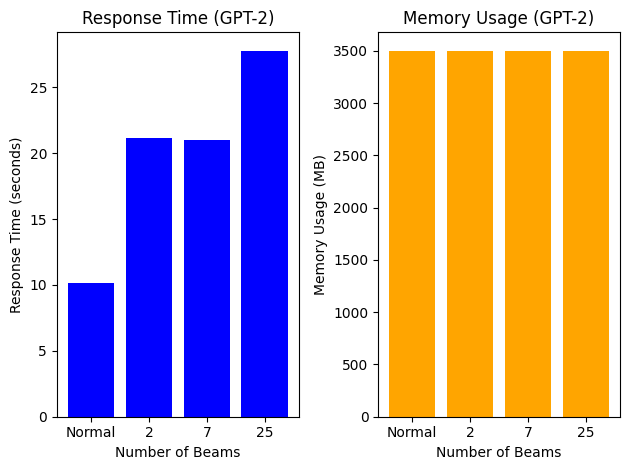

Response Time for GPT2 normal search: 10.149219036102295 seconds
Response Time for GPT2 two beam search: 21.179871082305908 seconds
Response Time for GPT2 seven beam search: 20.99333930015564 seconds
Response Time for GPT2 twenty-five beam search: 27.778374433517456 seconds

Memory Usage for GPT2 normal search: 3497.43MB
Memory Usage for GPT2 two beam search: 3503.12MB
Memory Usage for GPT2 seven beam search: 3503.24MB
Memory Usage for GPT2 twenty-five beam search: 3503.24MB


In [110]:
import matplotlib.pyplot as plt

# put the memory usage of using one beam to float variable
gpt2_m2 = float(f"{max(memory_used_gpt2_twoBeam):.2f}")

# put the memory usage of using seven beams to float variable
gpt2_m7 = float(f"{max(memory_used_gpt2_sevenBeam):.2f}")

# put the memory usage of using twenty-five beam to float variable
gpt2_m25 = float(f"{max(memory_used_gpt2_twentyFiveBeam):.2f}")

# put the memory usage of normal search to float variable
gpt2_mNormal = float(f"{max(memory_used_gpt2_normalSearch):.2f}")

# Sample data for the first graph
num_beams_1 = ["Normal","2","7","25"]
response_time = [response_time_gpt2_normalSearch,response_time_gpt2_twoBeam,response_time_gpt2_sevenBeam,response_time_gpt2_twentyFiveBeam]  # in seconds

# Sample data for the second graph
num_beams_2 = ["Normal","2","7","25"]
memory_usage = [gpt2_mNormal,gpt2_m2,gpt2_m7,gpt2_m25]  # in mb

# Create two subplots side by side
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.bar(num_beams_1, response_time, color='blue')
plt.xlabel('Number of Beams')
plt.ylabel('Response Time (seconds)')
plt.title('Response Time (GPT-2)')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(num_beams_2, memory_usage, color='orange')
plt.xlabel('Number of Beams')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage (GPT-2)')

# Adjust layout for better visualization
plt.tight_layout()

# Display the graphs
plt.show()

print(f"Response Time for GPT2 normal search: {response_time_gpt2_normalSearch} seconds")
print(f"Response Time for GPT2 two beam search: {response_time_gpt2_twoBeam} seconds")
print(f"Response Time for GPT2 seven beam search: {response_time_gpt2_sevenBeam} seconds")
print(f"Response Time for GPT2 twenty-five beam search: {response_time_gpt2_twentyFiveBeam} seconds")

print("")

print(f"Memory Usage for GPT2 normal search: {gpt2_mNormal}MB")
print(f"Memory Usage for GPT2 two beam search: {gpt2_m2}MB")
print(f"Memory Usage for GPT2 seven beam search: {gpt2_m7}MB")
print(f"Memory Usage for GPT2 twenty-five beam search: {gpt2_m25}MB")

<h3><b>DistilGPT-2 Results (creative)</b><h3>

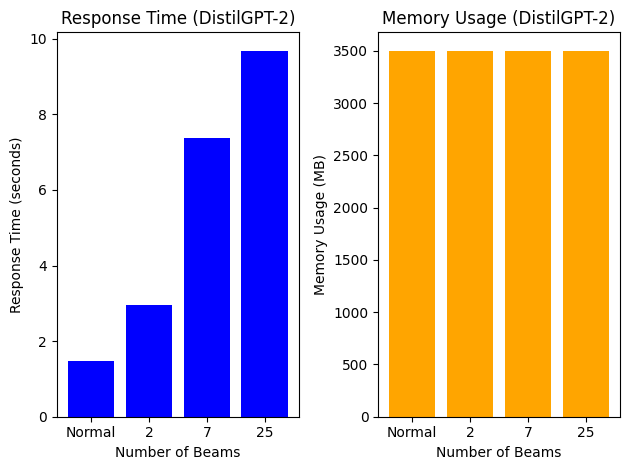

Response Time for DistilGPT-2 normal search: 1.4694678783416748 seconds
Response Time for DistilGPT-2 two beam search: 2.9620702266693115 seconds
Response Time for DistilGPT-2 seven beam search: 7.36434268951416 seconds
Response Time for DistilGPT-2 twenty-five beam search: 9.68375301361084 seconds

Memory Usage for DistilGPT-2 normal search: 3501.45MB
Memory Usage for DistilGPT-2 two beam search: 3496.43MB
Memory Usage for DistilGPT-2 seven beam search: 3498.45MB
Memory Usage for DistilGPT-2 twenty-five beam search: 3498.43MB


In [111]:
import matplotlib.pyplot as plt

# put the memory usage of using one beam to float variable
distilgpt2_m2 = float(f"{max(memory_used_distilgpt2_twoBeam):.2f}")

# put the memory usage of using seven beams to float variable
distilgpt2_m7 = float(f"{max(memory_used_distilgpt2_sevenBeam):.2f}")

# put the memory usage of using twenty-five beam to float variable
distilgpt2_m25 = float(f"{max(memory_used_distilgpt2_twentyFiveBeam):.2f}")

# put the memory usage of normal search to float variable
distilgpt2_mNormal = float(f"{max(memory_used_distilgpt2_normalSearch):.2f}")

# Sample data for the first graph
num_beams_1 = ["Normal","2","7","25"]
response_time = [response_time_distilgpt2_normalSearch,response_time_distilgpt2_twoBeam,response_time_distilgpt2_sevenBeam,response_time_distilgpt2_twentyFiveBeam]  # in seconds

# Sample data for the second graph
num_beams_2 = ["Normal","2","7","25"]
memory_usage = [distilgpt2_mNormal,distilgpt2_m2,distilgpt2_m7,distilgpt2_m25]  # in mb

# Create two subplots side by side
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.bar(num_beams_1, response_time, color='blue')
plt.xlabel('Number of Beams')
plt.ylabel('Response Time (seconds)')
plt.title('Response Time (DistilGPT-2)')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(num_beams_2, memory_usage, color='orange')
plt.xlabel('Number of Beams')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage (DistilGPT-2)')

# Adjust layout for better visualization
plt.tight_layout()

# Display the graphs
plt.show()

print(f"Response Time for DistilGPT-2 normal search: {response_time_distilgpt2_normalSearch} seconds")
print(f"Response Time for DistilGPT-2 two beam search: {response_time_distilgpt2_twoBeam} seconds")
print(f"Response Time for DistilGPT-2 seven beam search: {response_time_distilgpt2_sevenBeam} seconds")
print(f"Response Time for DistilGPT-2 twenty-five beam search: {response_time_distilgpt2_twentyFiveBeam} seconds")

print("")

print(f"Memory Usage for DistilGPT-2 normal search: {distilgpt2_mNormal}MB")
print(f"Memory Usage for DistilGPT-2 two beam search: {distilgpt2_m2}MB")
print(f"Memory Usage for DistilGPT-2 seven beam search: {distilgpt2_m7}MB")
print(f"Memory Usage for DistilGPT-2 twenty-five beam search: {distilgpt2_m25}MB")

<h3><b>BART Results (creative)</b><h3>

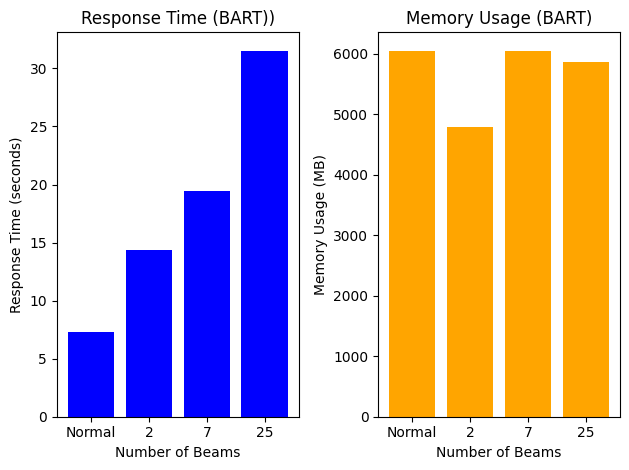

Response Time for BART normal search: 7.257095575332642 seconds
Response Time for BART two beam search: 14.342300653457642 seconds
Response Time for BART seven beam search: 19.402769088745117 seconds
Response Time for BART twenty-five beam search: 31.53269624710083 seconds

Memory Usage for BART normal search: 6051.31MB
Memory Usage for BART two beam search: 4795.48MB
Memory Usage for BART seven beam search: 6046.93MB
Memory Usage for BART twenty-five beam search: 5864.61MB


In [112]:
import matplotlib.pyplot as plt

# put the memory usage of using one beam to float variable
bart_m2 = float(f"{max(memory_used_bart_twoBeam):.2f}")

# put the memory usage of using seven beams to float variable
bart_m7 = float(f"{max(memory_used_bart_sevenBeam):.2f}")

# put the memory usage of using twenty-five beam to float variable
bart_m25 = float(f"{max(memory_used_bart_twentyFiveBeam):.2f}")

# put the memory usage of normal search to float variable
bart_mNormal = float(f"{max(memory_used_bart_normalSearch):.2f}")

# Sample data for the first graph
num_beams_1 = ["Normal","2","7","25"]
response_time = [response_time_bart_normalSearch,response_time_bart_twoBeam,response_time_bart_sevenBeam,response_time_bart_twentyFiveBeam]  # in seconds

# Sample data for the second graph
num_beams_2 = ["Normal","2","7","25"]
memory_usage = [bart_mNormal,bart_m2,bart_m7,bart_m25]  # in mb

# Create two subplots side by side
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.bar(num_beams_1, response_time, color='blue')
plt.xlabel('Number of Beams')
plt.ylabel('Response Time (seconds)')
plt.title('Response Time (BART))')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(num_beams_2, memory_usage, color='orange')
plt.xlabel('Number of Beams')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage (BART)')

# Adjust layout for better visualization
plt.tight_layout()

# Display the graphs
plt.show()


print(f"Response Time for BART normal search: {response_time_bart_normalSearch} seconds")
print(f"Response Time for BART two beam search: {response_time_bart_twoBeam} seconds")
print(f"Response Time for BART seven beam search: {response_time_bart_sevenBeam} seconds")
print(f"Response Time for BART twenty-five beam search: {response_time_bart_twentyFiveBeam} seconds")

print("")

print(f"Memory Usage for BART normal search: {bart_mNormal}MB")
print(f"Memory Usage for BART two beam search: {bart_m2}MB")
print(f"Memory Usage for BART seven beam search: {bart_m7}MB")
print(f"Memory Usage for BART twenty-five beam search: {bart_m25}MB")

<h3><b>Comparison of Response Time for Normal, 2 , 7 and 25 beam search for each model type (Creative Text Generation)</b><h3>

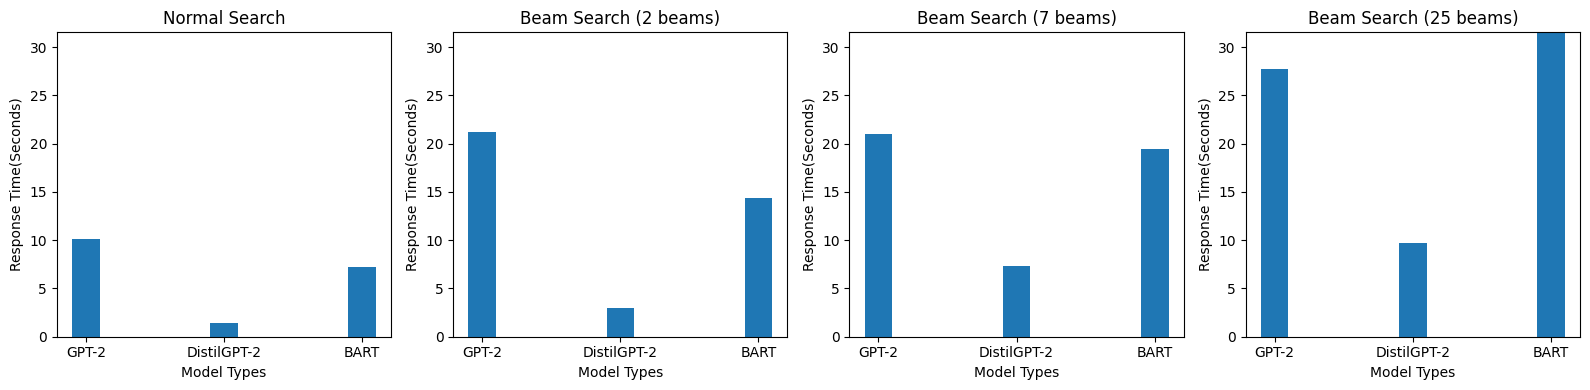

Response Time for GPT2 normal search: 10.149219036102295 seconds
Response Time for DistilGPT2 normal search: 1.4694678783416748 seconds
Response Time for BART normal search: 7.257095575332642 seconds

Response Time for GPT2 two beam search: 21.179871082305908 seconds
Response Time for DistilGPT2 two beam search: 2.9620702266693115 seconds
Response Time for BART two beam search: 14.342300653457642 seconds

Response Time for GPT2 seven beam search: 20.99333930015564 seconds
Response Time for DistilGPT2 seven beam search: 7.36434268951416 seconds
Response Time for BART seven beam search: 19.402769088745117 seconds

Response Time for GPT2 twenty five beam search: 27.778374433517456 seconds
Response Time for DistilGPT2 twenty five beam search: 9.68375301361084 seconds
Response Time for BART twenty five beam search: 31.53269624710083 seconds


In [113]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration
model_types = ['GPT-2', 'DistilGPT-2', 'BART']
values = np.array([[response_time_gpt2_normalSearch, response_time_gpt2_twoBeam, response_time_gpt2_sevenBeam, response_time_gpt2_twentyFiveBeam], [response_time_distilgpt2_normalSearch, response_time_distilgpt2_twoBeam, response_time_distilgpt2_sevenBeam, response_time_distilgpt2_twentyFiveBeam], [response_time_bart_normalSearch, response_time_bart_twoBeam, response_time_bart_sevenBeam, response_time_bart_twentyFiveBeam]])

# Setting up positions for bars
bar_width = 0.2
bar_positions = np.arange(len(model_types))

# Define different labels for each graph
labels_list = ['Normal Search', 'Beam Search (2 beams)', 'Beam Search (7 beams)', 'Beam Search (25 beams)']

# Transpose the values array to match the correct shape
graph_values = values.T.tolist()

# Calculate the maximum value among all data points
max_value = np.max(values)

# Create a figure with a single row and four columns
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Plotting each bar graph
for i, ax in enumerate(axs):
    ax.bar(bar_positions, graph_values[i], bar_width, label=labels_list[i])
    ax.set_xlabel('Model Types')
    ax.set_ylabel('Response Time(Seconds)')
    ax.set_title(labels_list[i])

    # Adding x-axis ticks and labels
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(model_types)

    # Set a common y-axis range
    ax.set_ylim(0, max_value)

    # Adding legend
    #ax.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

print(f"Response Time for GPT2 normal search: {response_time_gpt2_normalSearch} seconds")
print(f"Response Time for DistilGPT2 normal search: {response_time_distilgpt2_normalSearch} seconds")
print(f"Response Time for BART normal search: {response_time_bart_normalSearch} seconds")

print("")
print(f"Response Time for GPT2 two beam search: {response_time_gpt2_twoBeam} seconds")
print(f"Response Time for DistilGPT2 two beam search: {response_time_distilgpt2_twoBeam} seconds")
print(f"Response Time for BART two beam search: { response_time_bart_twoBeam} seconds")

print("")
print(f"Response Time for GPT2 seven beam search: {response_time_gpt2_sevenBeam} seconds")
print(f"Response Time for DistilGPT2 seven beam search: {response_time_distilgpt2_sevenBeam} seconds")
print(f"Response Time for BART seven beam search: {response_time_bart_sevenBeam} seconds")

print("")
print(f"Response Time for GPT2 twenty five beam search: {response_time_gpt2_twentyFiveBeam} seconds")
print(f"Response Time for DistilGPT2 twenty five beam search: {response_time_distilgpt2_twentyFiveBeam} seconds")
print(f"Response Time for BART twenty five beam search: {response_time_bart_twentyFiveBeam} seconds")

<h3><b>Comparison of Memory Usage for Normal, 2 , 7 and 25 beam search for each model type (Creative Text Generation)</b><h3>

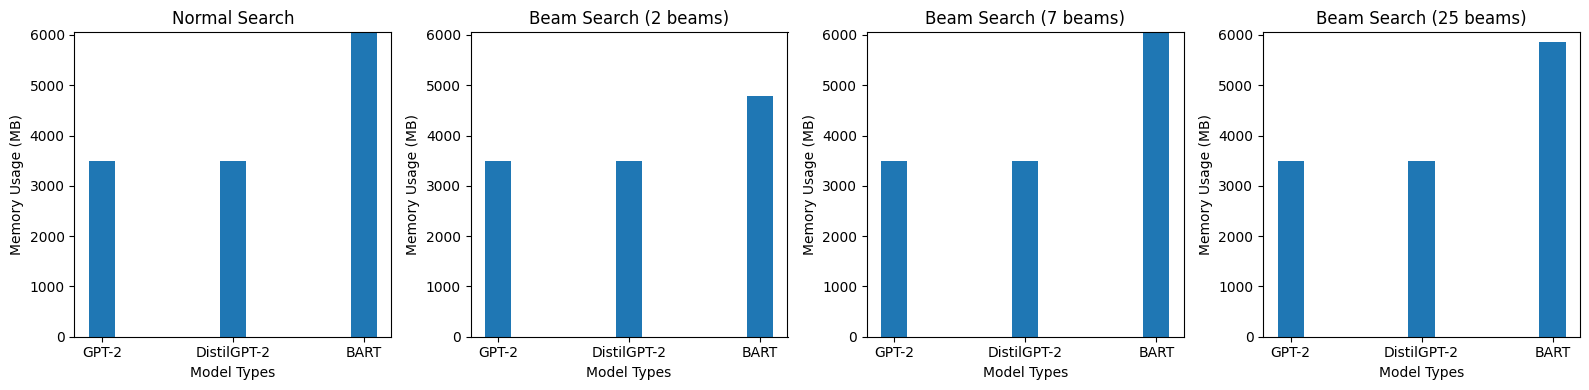

Memory Usage for GPT2 normal search: 3497.43MB
Memory Usage for DistilGPT2 normal search: 3501.45MB
Memory Usage for BART normal search: 6051.31MB

Memory Usage for GPT2 two beam search: 3503.12MB
Memory Usage for DistilGPT2 two beam search: 3496.43MB
Memory Usage for BART two beam search: 4795.48MB

Memory Usage for GPT2 seven beam search: 3503.24MB
Memory Usage for DistilGPT2 seven beam search: 3498.45MB
Memory Usage for BART seven beam search: 6046.93MB

Memory Usage for GPT2 twenty five beam search: 3503.24MB
Memory Usage for DistilGPT2 twenty five beam search: 3498.43MB
Memory Usage for BART twenty five beam search: 5864.61MB


In [114]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration
model_types = ['GPT-2', 'DistilGPT-2', 'BART']
values = np.array([[gpt2_mNormal, gpt2_m2, gpt2_m7, gpt2_m25], [distilgpt2_mNormal, distilgpt2_m2, distilgpt2_m7, distilgpt2_m25], [bart_mNormal, bart_m2, bart_m7, bart_m25]])

# Setting up positions for bars
bar_width = 0.2
bar_positions = np.arange(len(model_types))

# Define different labels for each graph
labels_list = ['Normal Search', 'Beam Search (2 beams)', 'Beam Search (7 beams)', 'Beam Search (25 beams)']

# Transpose the values array to match the correct shape
graph_values = values.T.tolist()

# Calculate the maximum value among all data points
max_value = np.max(values)

# Create a figure with a single row and four columns
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Plotting each bar graph
for i, ax in enumerate(axs):
    ax.bar(bar_positions, graph_values[i], bar_width, label=labels_list[i])
    ax.set_xlabel('Model Types')
    ax.set_ylabel('Memory Usage (MB)')
    ax.set_title(labels_list[i])

    # Adding x-axis ticks and labels
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(model_types)

    # Set a common y-axis range
    ax.set_ylim(0, max_value)

    # Adding legend
    #ax.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

print(f"Memory Usage for GPT2 normal search: {gpt2_mNormal}MB")
print(f"Memory Usage for DistilGPT2 normal search: {distilgpt2_mNormal}MB")
print(f"Memory Usage for BART normal search: {bart_mNormal}MB")

print("")
print(f"Memory Usage for GPT2 two beam search: {gpt2_m2}MB")
print(f"Memory Usage for DistilGPT2 two beam search: {distilgpt2_m2}MB")
print(f"Memory Usage for BART two beam search: {bart_m2}MB")

print("")
print(f"Memory Usage for GPT2 seven beam search: {gpt2_m7}MB")
print(f"Memory Usage for DistilGPT2 seven beam search: {distilgpt2_m7}MB")
print(f"Memory Usage for BART seven beam search: {bart_m7}MB")

print("")
print(f"Memory Usage for GPT2 twenty five beam search: {gpt2_m25}MB")
print(f"Memory Usage for DistilGPT2 twenty five beam search: {distilgpt2_m25}MB")
print(f"Memory Usage for BART twenty five beam search: {bart_m25}MB")


## <h3><b>Response Time and Memory Usage Of Text Generation using GPT-2,DistilGPT-2 and BART on bar graphs (Scientific input prompt)</b><h3>

<h3><b>GPT-2 Results (scientific)</b><h3>

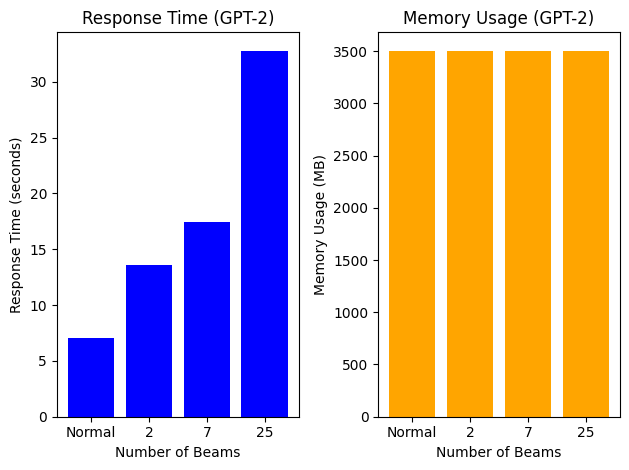

Response Time for GPT2 normal search (scientific): 7.082395792007446 seconds
Response Time for GPT2 two beam search (scientific): 13.605116844177246 seconds
Response Time for GPT2 seven beam search (scientific): 17.4373140335083 seconds
Response Time for GPT2 twenty-five beam search (scientific): 32.79523944854736 seconds

Memory Usage for GPT2 normal search (scientific): 3504.41MB
Memory Usage for GPT2 two beam search (scientific): 3503.39MB
Memory Usage for GPT2 seven beam search (scientific): 3503.41MB
Memory Usage for GPT2 twenty-five beam search (scientific): 3503.41MB


In [115]:
import matplotlib.pyplot as plt

# put the memory usage of using one beam to float variable
gpt2_m2_scientific = float(f"{max(memory_used_gpt2_twoBeam_scientific):.2f}")

# put the memory usage of using seven beams to float variable
gpt2_m7_scientific = float(f"{max(memory_used_gpt2_sevenBeam_scientific):.2f}")

# put the memory usage of using twenty-five beam to float variable
gpt2_m25_scientific = float(f"{max(memory_used_gpt2_twentyFiveBeam_scientific):.2f}")

# put the memory usage of normal search to float variable
gpt2_mNormal_scientific = float(f"{max(memory_used_gpt2_normalSearch_scientific):.2f}")

# Sample data for the first graph
num_beams_1 = ["Normal","2","7","25"]
response_time = [response_time_gpt2_normalSearch_scientific,response_time_gpt2_twoBeam_scientific,response_time_gpt2_sevenBeam_scientific,response_time_gpt2_twentyFiveBeam_scientific]  # in seconds

# Sample data for the second graph
num_beams_2 = ["Normal","2","7","25"]
memory_usage = [gpt2_mNormal_scientific,gpt2_m2_scientific,gpt2_m7_scientific,gpt2_m25_scientific]  # in mb

# Create two subplots side by side
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.bar(num_beams_1, response_time, color='blue')
plt.xlabel('Number of Beams')
plt.ylabel('Response Time (seconds)')
plt.title('Response Time (GPT-2)')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(num_beams_2, memory_usage, color='orange')
plt.xlabel('Number of Beams')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage (GPT-2)')

# Adjust layout for better visualization
plt.tight_layout()

# Display the graphs
plt.show()

print(f"Response Time for GPT2 normal search (scientific): {response_time_gpt2_normalSearch_scientific} seconds")
print(f"Response Time for GPT2 two beam search (scientific): {response_time_gpt2_twoBeam_scientific} seconds")
print(f"Response Time for GPT2 seven beam search (scientific): {response_time_gpt2_sevenBeam_scientific} seconds")
print(f"Response Time for GPT2 twenty-five beam search (scientific): {response_time_gpt2_twentyFiveBeam_scientific} seconds")

print("")

print(f"Memory Usage for GPT2 normal search (scientific): {gpt2_mNormal_scientific}MB")
print(f"Memory Usage for GPT2 two beam search (scientific): {gpt2_m2_scientific}MB")
print(f"Memory Usage for GPT2 seven beam search (scientific): {gpt2_m7_scientific}MB")
print(f"Memory Usage for GPT2 twenty-five beam search (scientific): {gpt2_m25_scientific}MB")

<h3><b>DistilGPT-2 Results (scientific)</b><h3>

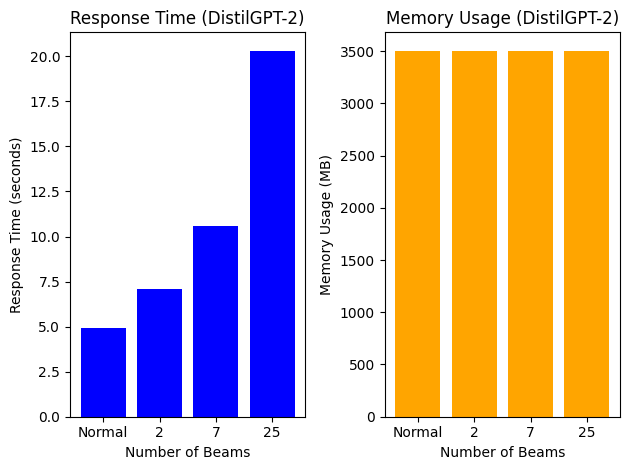

Response Time for DistilGPT-2 normal search (scientific): 4.950746774673462 seconds
Response Time for DistilGPT-2 two beam search (scientific): 7.079152584075928 seconds
Response Time for DistilGPT-2 seven beam search (scientific): 10.583862543106079 seconds
Response Time for DistilGPT-2 twenty-five beam search (scientific): 20.3136248588562 seconds

Memory Usage for DistilGPT-2 normal search (scientific): 3504.45MB
Memory Usage for DistilGPT-2 two beam search (scientific): 3503.44MB
Memory Usage for DistilGPT-2 seven beam search (scientific): 3504.42MB
Memory Usage for DistilGPT-2 twenty-five beam search (scientific): 3504.44MB


In [116]:
import matplotlib.pyplot as plt

# put the memory usage of using one beam to float variable
distilgpt2_m2_scientific = float(f"{max(memory_used_distilgpt2_twoBeam_scientific):.2f}")

# put the memory usage of using seven beams to float variable
distilgpt2_m7_scientific = float(f"{max(memory_used_distilgpt2_sevenBeam_scientific):.2f}")

# put the memory usage of using twenty-five beam to float variable
distilgpt2_m25_scientific = float(f"{max(memory_used_distilgpt2_twentyFiveBeam_scientific):.2f}")

# put the memory usage of normal search to float variable
distilgpt2_mNormal_scientific = float(f"{max(memory_used_distilgpt2_normalSearch_scientific):.2f}")

# Sample data for the first graph
num_beams_1 = ["Normal","2","7","25"]
response_time = [response_time_distilgpt2_normalSearch_scientific,response_time_distilgpt2_twoBeam_scientific,response_time_distilgpt2_sevenBeam_scientific,response_time_distilgpt2_twentyFiveBeam_scientific]  # in seconds

# Sample data for the second graph
num_beams_2 = ["Normal","2","7","25"]
memory_usage = [distilgpt2_mNormal_scientific,distilgpt2_m2_scientific,distilgpt2_m7_scientific,distilgpt2_m25_scientific]  # in mb

# Create two subplots side by side
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.bar(num_beams_1, response_time, color='blue')
plt.xlabel('Number of Beams')
plt.ylabel('Response Time (seconds)')
plt.title('Response Time (DistilGPT-2)')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(num_beams_2, memory_usage, color='orange')
plt.xlabel('Number of Beams')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage (DistilGPT-2)')

# Adjust layout for better visualization
plt.tight_layout()

# Display the graphs
plt.show()

print(f"Response Time for DistilGPT-2 normal search (scientific): {response_time_distilgpt2_normalSearch_scientific} seconds")
print(f"Response Time for DistilGPT-2 two beam search (scientific): {response_time_distilgpt2_twoBeam_scientific} seconds")
print(f"Response Time for DistilGPT-2 seven beam search (scientific): {response_time_distilgpt2_sevenBeam_scientific} seconds")
print(f"Response Time for DistilGPT-2 twenty-five beam search (scientific): {response_time_distilgpt2_twentyFiveBeam_scientific} seconds")

print("")

print(f"Memory Usage for DistilGPT-2 normal search (scientific): {distilgpt2_mNormal_scientific}MB")
print(f"Memory Usage for DistilGPT-2 two beam search (scientific): {distilgpt2_m2_scientific}MB")
print(f"Memory Usage for DistilGPT-2 seven beam search (scientific): {distilgpt2_m7_scientific}MB")
print(f"Memory Usage for DistilGPT-2 twenty-five beam search (scientific): {distilgpt2_m25_scientific}MB")

<h3><b>BART Results (scientific)</b><h3>

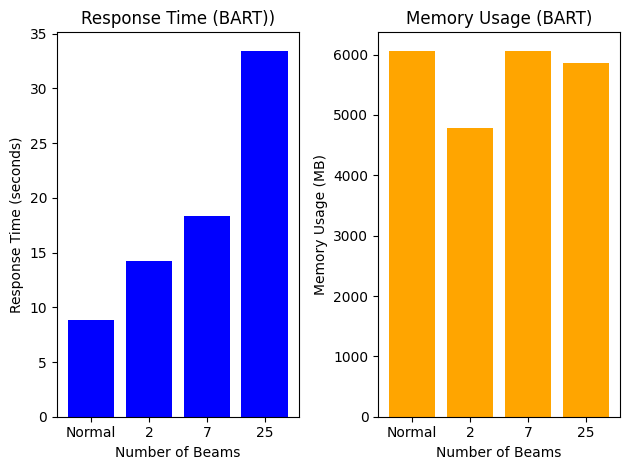

Response Time for BART normal search (scientific): 8.79904818534851 seconds
Response Time for BART two beam search (scientific): 14.249876022338867 seconds
Response Time for BART seven beam search (scientific): 18.30369210243225 seconds
Response Time for BART twenty-five beam search (scientific): 33.45009660720825 seconds

Memory Usage for BART normal search (scientific): 6065.07MB
Memory Usage for BART two beam search (scientific): 4780.36MB
Memory Usage for BART seven beam search (scientific): 6052.73MB
Memory Usage for BART twenty-five beam search (scientific): 5861.05MB


In [117]:
import matplotlib.pyplot as plt

# put the memory usage of using one beam to float variable
bart_m2_scientific = float(f"{max(memory_used_bart_twoBeam_scientific):.2f}")

# put the memory usage of using seven beams to float variable
bart_m7_scientific = float(f"{max(memory_used_bart_sevenBeam_scientific):.2f}")

# put the memory usage of using twenty-five beam to float variable
bart_m25_scientific = float(f"{max(memory_used_bart_twentyFiveBeam_scientific):.2f}")

# put the memory usage of normal search to float variable
bart_mNormal_scientific = float(f"{max(memory_used_bart_normalSearch_scientific):.2f}")

# Sample data for the first graph
num_beams_1 = ["Normal","2","7","25"]
response_time = [response_time_bart_normalSearch_scientific,response_time_bart_twoBeam_scientific,response_time_bart_sevenBeam_scientific,response_time_bart_twentyFiveBeam_scientific]  # in seconds

# Sample data for the second graph
num_beams_2 = ["Normal","2","7","25"]
memory_usage = [bart_mNormal_scientific,bart_m2_scientific,bart_m7_scientific,bart_m25_scientific]  # in mb

# Create two subplots side by side
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.bar(num_beams_1, response_time, color='blue')
plt.xlabel('Number of Beams')
plt.ylabel('Response Time (seconds)')
plt.title('Response Time (BART))')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(num_beams_2, memory_usage, color='orange')
plt.xlabel('Number of Beams')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage (BART)')

# Adjust layout for better visualization
plt.tight_layout()

# Display the graphs
plt.show()


print(f"Response Time for BART normal search (scientific): {response_time_bart_normalSearch_scientific} seconds")
print(f"Response Time for BART two beam search (scientific): {response_time_bart_twoBeam_scientific} seconds")
print(f"Response Time for BART seven beam search (scientific): {response_time_bart_sevenBeam_scientific} seconds")
print(f"Response Time for BART twenty-five beam search (scientific): {response_time_bart_twentyFiveBeam_scientific} seconds")

print("")

print(f"Memory Usage for BART normal search (scientific): {bart_mNormal_scientific}MB")
print(f"Memory Usage for BART two beam search (scientific): {bart_m2_scientific}MB")
print(f"Memory Usage for BART seven beam search (scientific): {bart_m7_scientific}MB")
print(f"Memory Usage for BART twenty-five beam search (scientific): {bart_m25_scientific}MB")

<h3><b>Comparison of Response Time for Normal, 2 , 7 and 25 beam search for each model type (Scientific Text Generation)</b><h3>

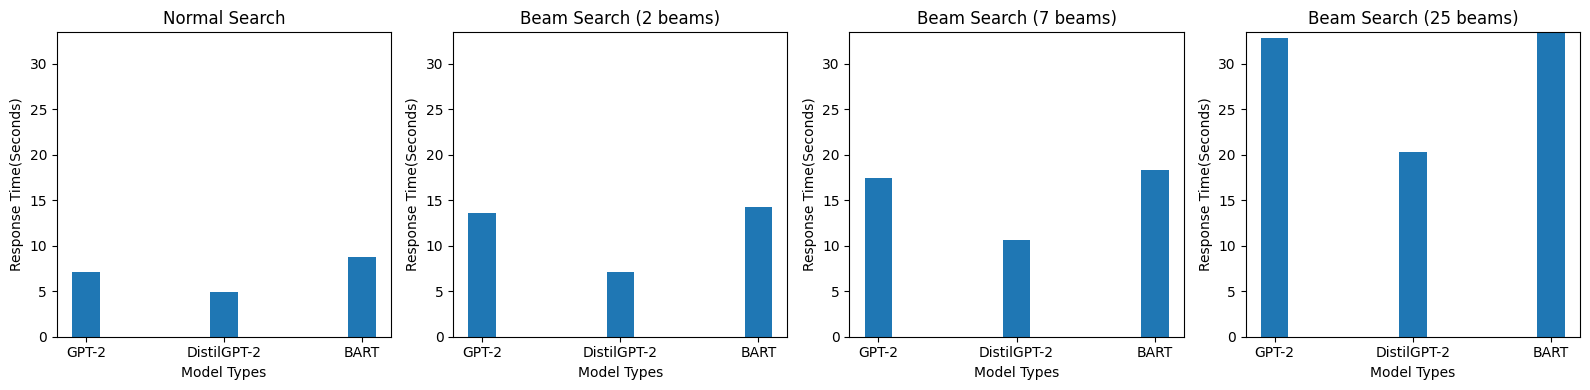

Response Time for GPT2 normal search: 7.082395792007446 seconds
Response Time for DistilGPT2 normal search: 4.950746774673462 seconds
Response Time for BART normal search: 8.79904818534851 seconds

Response Time for GPT2 two beam search: 13.605116844177246 seconds
Response Time for DistilGPT2 two beam search: 7.079152584075928 seconds
Response Time for BART two beam search: 14.249876022338867 seconds

Response Time for GPT2 seven beam search: 17.4373140335083 seconds
Response Time for DistilGPT2 seven beam search: 10.583862543106079 seconds
Response Time for BART seven beam search: 18.30369210243225 seconds

Response Time for GPT2 twenty five beam search: 32.79523944854736 seconds
Response Time for DistilGPT2 twenty five beam search: 20.3136248588562 seconds
Response Time for BART twenty five beam search: 33.45009660720825 seconds


In [118]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration
model_types = ['GPT-2', 'DistilGPT-2', 'BART']
values = np.array([[response_time_gpt2_normalSearch_scientific, response_time_gpt2_twoBeam_scientific, response_time_gpt2_sevenBeam_scientific, response_time_gpt2_twentyFiveBeam_scientific], [response_time_distilgpt2_normalSearch_scientific, response_time_distilgpt2_twoBeam_scientific, response_time_distilgpt2_sevenBeam_scientific, response_time_distilgpt2_twentyFiveBeam_scientific], [response_time_bart_normalSearch_scientific, response_time_bart_twoBeam_scientific, response_time_bart_sevenBeam_scientific, response_time_bart_twentyFiveBeam_scientific]])

# Setting up positions for bars
bar_width = 0.2
bar_positions = np.arange(len(model_types))

# Define different labels for each graph
labels_list = ['Normal Search', 'Beam Search (2 beams)', 'Beam Search (7 beams)', 'Beam Search (25 beams)']

# Transpose the values array to match the correct shape
graph_values = values.T.tolist()

# Calculate the maximum value among all data points
max_value = np.max(values)

# Create a figure with a single row and four columns
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Plotting each bar graph
for i, ax in enumerate(axs):
    ax.bar(bar_positions, graph_values[i], bar_width, label=labels_list[i])
    ax.set_xlabel('Model Types')
    ax.set_ylabel('Response Time(Seconds)')
    ax.set_title(labels_list[i])

    # Adding x-axis ticks and labels
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(model_types)

    # Set a common y-axis range
    ax.set_ylim(0, max_value)

    # Adding legend
    #ax.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

print(f"Response Time for GPT2 normal search: {response_time_gpt2_normalSearch_scientific} seconds")
print(f"Response Time for DistilGPT2 normal search: {response_time_distilgpt2_normalSearch_scientific} seconds")
print(f"Response Time for BART normal search: {response_time_bart_normalSearch_scientific} seconds")

print("")
print(f"Response Time for GPT2 two beam search: {response_time_gpt2_twoBeam_scientific} seconds")
print(f"Response Time for DistilGPT2 two beam search: {response_time_distilgpt2_twoBeam_scientific} seconds")
print(f"Response Time for BART two beam search: { response_time_bart_twoBeam_scientific} seconds")

print("")
print(f"Response Time for GPT2 seven beam search: {response_time_gpt2_sevenBeam_scientific} seconds")
print(f"Response Time for DistilGPT2 seven beam search: {response_time_distilgpt2_sevenBeam_scientific} seconds")
print(f"Response Time for BART seven beam search: {response_time_bart_sevenBeam_scientific} seconds")

print("")
print(f"Response Time for GPT2 twenty five beam search: {response_time_gpt2_twentyFiveBeam_scientific} seconds")
print(f"Response Time for DistilGPT2 twenty five beam search: {response_time_distilgpt2_twentyFiveBeam_scientific} seconds")
print(f"Response Time for BART twenty five beam search: {response_time_bart_twentyFiveBeam_scientific} seconds")

<h3><b>Comparison of Memory Usage for Normal, 2 , 7 and 25 beam search for each model type (Scientific Text Generation)</b><h3>

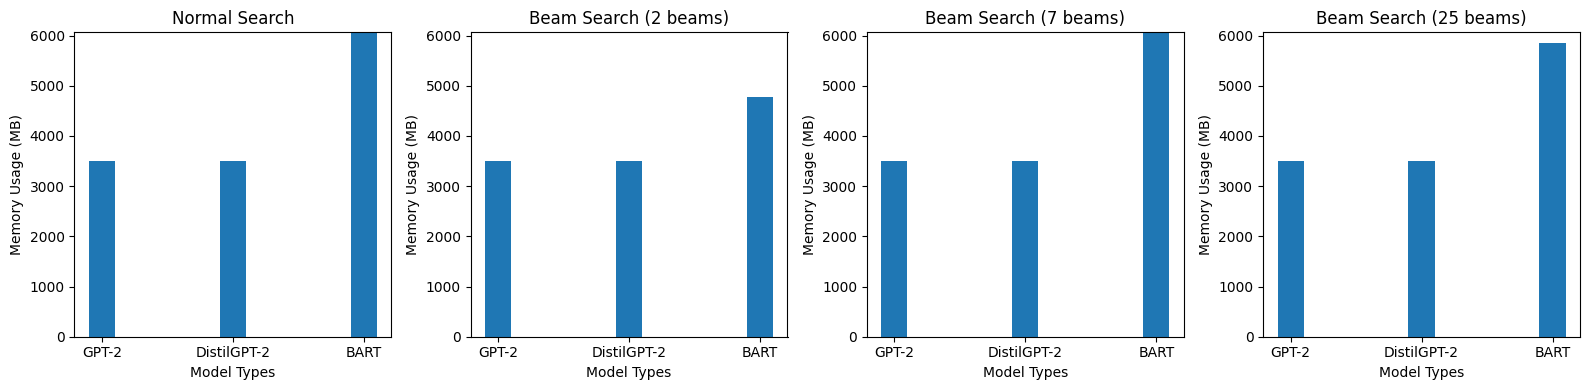

Memory Usage for GPT2 normal search: 3504.41MB
Memory Usage for DistilGPT2 normal search: 3504.45MB
Memory Usage for BART normal search: 6065.07MB

Memory Usage for GPT2 two beam search: 3503.39MB
Memory Usage for DistilGPT2 two beam search: 3503.44MB
Memory Usage for BART two beam search: 4780.36MB

Memory Usage for GPT2 seven beam search: 3503.41MB
Memory Usage for DistilGPT2 seven beam search: 3504.42MB
Memory Usage for BART seven beam search: 6052.73MB

Memory Usage for GPT2 twenty five beam search: 3503.41MB
Memory Usage for DistilGPT2 twenty five beam search: 3504.44MB
Memory Usage for BART twenty five beam search: 5861.05MB


In [119]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration
model_types = ['GPT-2', 'DistilGPT-2', 'BART']
values = np.array([[gpt2_mNormal_scientific, gpt2_m2_scientific, gpt2_m7_scientific, gpt2_m25_scientific], [distilgpt2_mNormal_scientific, distilgpt2_m2_scientific, distilgpt2_m7_scientific, distilgpt2_m25_scientific], [bart_mNormal_scientific, bart_m2_scientific, bart_m7_scientific, bart_m25_scientific]])

# Setting up positions for bars
bar_width = 0.2
bar_positions = np.arange(len(model_types))

# Define different labels for each graph
labels_list = ['Normal Search', 'Beam Search (2 beams)', 'Beam Search (7 beams)', 'Beam Search (25 beams)']

# Transpose the values array to match the correct shape
graph_values = values.T.tolist()

# Calculate the maximum value among all data points
max_value = np.max(values)

# Create a figure with a single row and four columns
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Plotting each bar graph
for i, ax in enumerate(axs):
    ax.bar(bar_positions, graph_values[i], bar_width, label=labels_list[i])
    ax.set_xlabel('Model Types')
    ax.set_ylabel('Memory Usage (MB)')
    ax.set_title(labels_list[i])

    # Adding x-axis ticks and labels
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(model_types)

    # Set a common y-axis range
    ax.set_ylim(0, max_value)

    # Adding legend
    #ax.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

print(f"Memory Usage for GPT2 normal search: {gpt2_mNormal_scientific}MB")
print(f"Memory Usage for DistilGPT2 normal search: {distilgpt2_mNormal_scientific}MB")
print(f"Memory Usage for BART normal search: {bart_mNormal_scientific}MB")

print("")
print(f"Memory Usage for GPT2 two beam search: {gpt2_m2_scientific}MB")
print(f"Memory Usage for DistilGPT2 two beam search: {distilgpt2_m2_scientific}MB")
print(f"Memory Usage for BART two beam search: {bart_m2_scientific}MB")

print("")
print(f"Memory Usage for GPT2 seven beam search: {gpt2_m7_scientific}MB")
print(f"Memory Usage for DistilGPT2 seven beam search: {distilgpt2_m7_scientific}MB")
print(f"Memory Usage for BART seven beam search: {bart_m7_scientific}MB")

print("")
print(f"Memory Usage for GPT2 twenty five beam search: {gpt2_m25_scientific}MB")
print(f"Memory Usage for DistilGPT2 twenty five beam search: {distilgpt2_m25_scientific}MB")
print(f"Memory Usage for BART twenty five beam search: {bart_m25_scientific}MB")

## <h3><b>Response Time and Memory Usage of Machine Translation Of French,Bahasa Indonesia And Chinese</b><h3>

<h3><b>Response Time and Memory Usage for MarianMT French translation</b><h3>

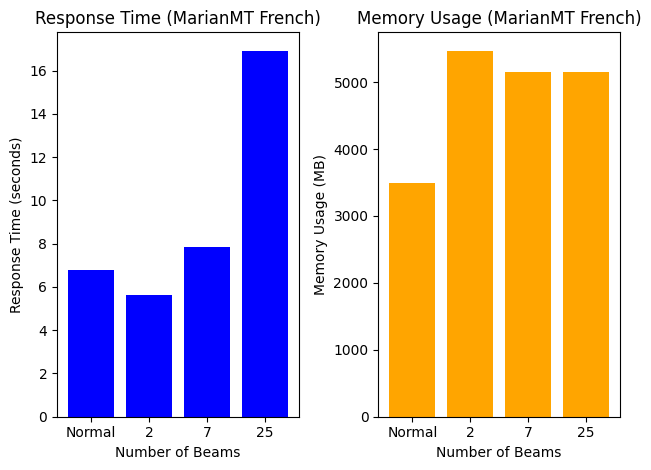

Response Time for French Translation normal search: 6.778929233551025 seconds
Response Time for French Translation two beam search: 5.607549428939819 seconds
Response Time for French Translation seven beam search: 7.8302507400512695 seconds
Response Time for French Translation twenty-five beam search: 16.9194016456604 seconds

Memory Usage for French Translation normal search: 3493.29MB
Memory Usage for French Translation two beam search: 5470.87MB
Memory Usage for French Translation seven beam search: 5154.62MB
Memory Usage for French Translation twenty-five beam search: 5154.63MB


In [120]:
import matplotlib.pyplot as plt

# put the memory usage of using one beam to float variable
marianMTFrench_m2 = float(f"{max(memory_used_MarianMTFrench_twoBeam):.2f}")

# put the memory usage of using seven beams to float variable
marianMTFrench_m7 = float(f"{max(memory_used_MarianMTFrench_sevenBeam):.2f}")

# put the memory usage of using twenty-five beam to float variable
marianMTFrench_m25 = float(f"{max(memory_used_MarianMTFrench_twentyFiveBeam):.2f}")

# put the memory usage of normal search to float variable
marianMTFrench_mNormal = float(f"{max(memory_used_MarianMTFrench_normalSearch):.2f}")

# Sample data for the first graph
num_beams_1 = ["Normal","2","7","25"]
response_time = [response_time_MarianMTFrench_normalSearch,response_time_MarianMTFrench_twoBeam,response_time_MarianMTFrench_sevenBeam,response_time_MarianMTFrench_twentyFiveBeam]  # in seconds

# Sample data for the second graph
num_beams_2 = ["Normal","2","7","25"]
memory_usage = [marianMTFrench_mNormal,marianMTFrench_m2,marianMTFrench_m7,marianMTFrench_m25]  # in mb

# Create two subplots side by side
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.bar(num_beams_1, response_time, color='blue')
plt.xlabel('Number of Beams')
plt.ylabel('Response Time (seconds)')
plt.title('Response Time (MarianMT French)')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(num_beams_2, memory_usage, color='orange')
plt.xlabel('Number of Beams')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage (MarianMT French)')

# Adjust layout for better visualization
plt.tight_layout()

# Display the graphs
plt.show()

print(f"Response Time for French Translation normal search: {response_time_MarianMTFrench_normalSearch} seconds")
print(f"Response Time for French Translation two beam search: {response_time_MarianMTFrench_twoBeam} seconds")
print(f"Response Time for French Translation seven beam search: {response_time_MarianMTFrench_sevenBeam} seconds")
print(f"Response Time for French Translation twenty-five beam search: {response_time_MarianMTFrench_twentyFiveBeam} seconds")

print("")

print(f"Memory Usage for French Translation normal search: {marianMTFrench_mNormal}MB")
print(f"Memory Usage for French Translation two beam search: {marianMTFrench_m2}MB")
print(f"Memory Usage for French Translation seven beam search: {marianMTFrench_m7}MB")
print(f"Memory Usage for French Translation twenty-five beam search: {marianMTFrench_m25}MB")

<h3><b>Response Time and Memory Usage for MarianMT Bahasa Indonesia translation</b><h3>

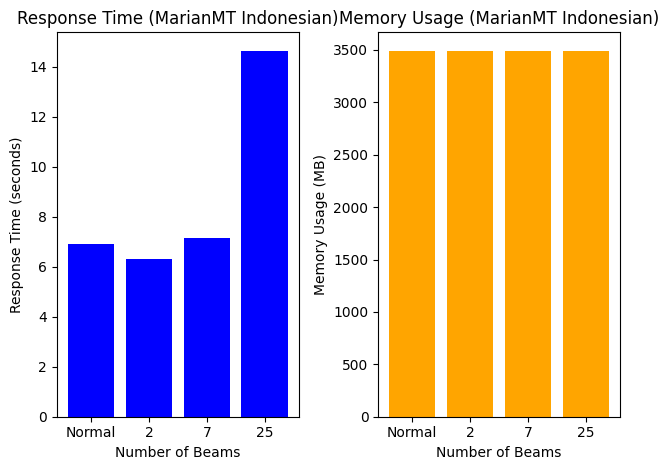

Response Time for Indonesian Translation normal search: 6.902743816375732 seconds
Response Time for Indonesian Translation two beam search: 6.298314094543457 seconds
Response Time for Indonesian Translation seven beam search: 7.134466171264648 seconds
Response Time for Indonesian Translation twenty-five beam search: 14.639896392822266 seconds

Memory Usage for Indonesian Translation normal search: 3493.3MB
Memory Usage for Indonesian Translation two beam search: 3493.29MB
Memory Usage for Indonesian Translation seven beam search: 3493.3MB
Memory Usage for Indonesian Translation twenty-five beam search: 3493.3MB


In [121]:
import matplotlib.pyplot as plt

# put the memory usage of using one beam to float variable
marianMTIndonesian_m2 = float(f"{max(memory_used_MarianMTIndonesian_twoBeam):.2f}")

# put the memory usage of using seven beams to float variable
marianMTIndonesian_m7 = float(f"{max(memory_used_MarianMTIndonesian_sevenBeam):.2f}")

# put the memory usage of using twenty-five beam to float variable
marianMTIndonesian_m25 = float(f"{max(memory_used_MarianMTIndonesian_twentyFiveBeam):.2f}")

# put the memory usage of normal search to float variable
marianMTIndonesian_mNormal = float(f"{max(memory_used_MarianMTIndonesian_normalSearch):.2f}")

# Sample data for the first graph
num_beams_1 = ["Normal","2","7","25"]
response_time = [response_time_MarianMTIndonesian_normalSearch,response_time_MarianMTIndonesian_twoBeam,response_time_MarianMTIndonesian_sevenBeam,response_time_MarianMTIndonesian_twentyFiveBeam]  # in seconds

# Sample data for the second graph
num_beams_2 = ["Normal","2","7","25"]
memory_usage = [marianMTIndonesian_mNormal,marianMTIndonesian_m2,marianMTIndonesian_m7,marianMTIndonesian_m25]  # in mb

# Create two subplots side by side
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.bar(num_beams_1, response_time, color='blue')
plt.xlabel('Number of Beams')
plt.ylabel('Response Time (seconds)')
plt.title('Response Time (MarianMT Indonesian)')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(num_beams_2, memory_usage, color='orange')
plt.xlabel('Number of Beams')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage (MarianMT Indonesian)')

# Adjust layout for better visualization
plt.tight_layout()

# Display the graphs
plt.show()

print(f"Response Time for Indonesian Translation normal search: {response_time_MarianMTIndonesian_normalSearch} seconds")
print(f"Response Time for Indonesian Translation two beam search: {response_time_MarianMTIndonesian_twoBeam} seconds")
print(f"Response Time for Indonesian Translation seven beam search: {response_time_MarianMTIndonesian_sevenBeam} seconds")
print(f"Response Time for Indonesian Translation twenty-five beam search: {response_time_MarianMTIndonesian_twentyFiveBeam} seconds")

print("")

print(f"Memory Usage for Indonesian Translation normal search: {marianMTIndonesian_mNormal}MB")
print(f"Memory Usage for Indonesian Translation two beam search: {marianMTIndonesian_m2}MB")
print(f"Memory Usage for Indonesian Translation seven beam search: {marianMTIndonesian_m7}MB")
print(f"Memory Usage for Indonesian Translation twenty-five beam search: {marianMTIndonesian_m25}MB")

<h3><b>Response Time and Memory Usage for MarianMT Chinese translation</b><h3>

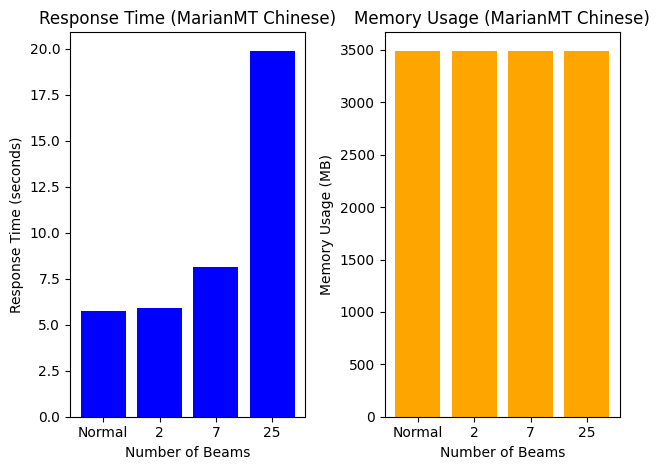

Response Time for Chinese Translation normal search: 5.751516342163086 seconds
Response Time for Chinese Translation two beam search: 5.906911373138428 seconds
Response Time for Chinese Translation seven beam search: 8.123948812484741 seconds
Response Time for Chinese Translation twenty-five beam search: 19.901201486587524 seconds

Memory Usage for Chinese Translation normal search: 3493.3MB
Memory Usage for Chinese Translation two beam search: 3493.3MB
Memory Usage for Chinese Translation seven beam search: 3493.3MB
Memory Usage for Chinese Translation twenty-five beam search: 3493.3MB


In [122]:
import matplotlib.pyplot as plt

# put the memory usage of using one beam to float variable
marianMTChinese_m2 = float(f"{max(memory_used_MarianMTChinese_twoBeam):.2f}")

# put the memory usage of using seven beams to float variable
marianMTChinese_m7 = float(f"{max(memory_used_MarianMTChinese_sevenBeam):.2f}")

# put the memory usage of using twenty-five beam to float variable
marianMTChinese_m25 = float(f"{max(memory_used_MarianMTChinese_twentyFiveBeam):.2f}")

# put the memory usage of normal search to float variable
marianMTChinese_mNormal = float(f"{max(memory_used_MarianMTChinese_normalSearch):.2f}")

# Sample data for the first graph
num_beams_1 = ["Normal","2","7","25"]
response_time = [response_time_MarianMTChinese_normalSearch,response_time_MarianMTChinese_twoBeam,response_time_MarianMTChinese_sevenBeam,response_time_MarianMTChinese_twentyFiveBeam]  # in seconds

# Sample data for the second graph
num_beams_2 = ["Normal","2","7","25"]
memory_usage = [marianMTChinese_mNormal,marianMTChinese_m2,marianMTChinese_m7,marianMTChinese_m25]  # in mb

# Create two subplots side by side
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.bar(num_beams_1, response_time, color='blue')
plt.xlabel('Number of Beams')
plt.ylabel('Response Time (seconds)')
plt.title('Response Time (MarianMT Chinese)')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(num_beams_2, memory_usage, color='orange')
plt.xlabel('Number of Beams')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage (MarianMT Chinese)')

# Adjust layout for better visualization
plt.tight_layout()

# Display the graphs
plt.show()

print(f"Response Time for Chinese Translation normal search: {response_time_MarianMTChinese_normalSearch} seconds")
print(f"Response Time for Chinese Translation two beam search: {response_time_MarianMTChinese_twoBeam} seconds")
print(f"Response Time for Chinese Translation seven beam search: {response_time_MarianMTChinese_sevenBeam} seconds")
print(f"Response Time for Chinese Translation twenty-five beam search: {response_time_MarianMTChinese_twentyFiveBeam} seconds")

print("")

print(f"Memory Usage for Chinese Translation normal search: {marianMTChinese_mNormal}MB")
print(f"Memory Usage for Chinese Translation two beam search: {marianMTChinese_m2}MB")
print(f"Memory Usage for Chinese Translation seven beam search: {marianMTChinese_m7}MB")
print(f"Memory Usage for Chinese Translation twenty-five beam search: {marianMTChinese_m25}MB")

<h3><b>Comparison of Response Time for Normal, 2 , 7 and 25 beam search for each model type (Machine Translation)</b><h3>

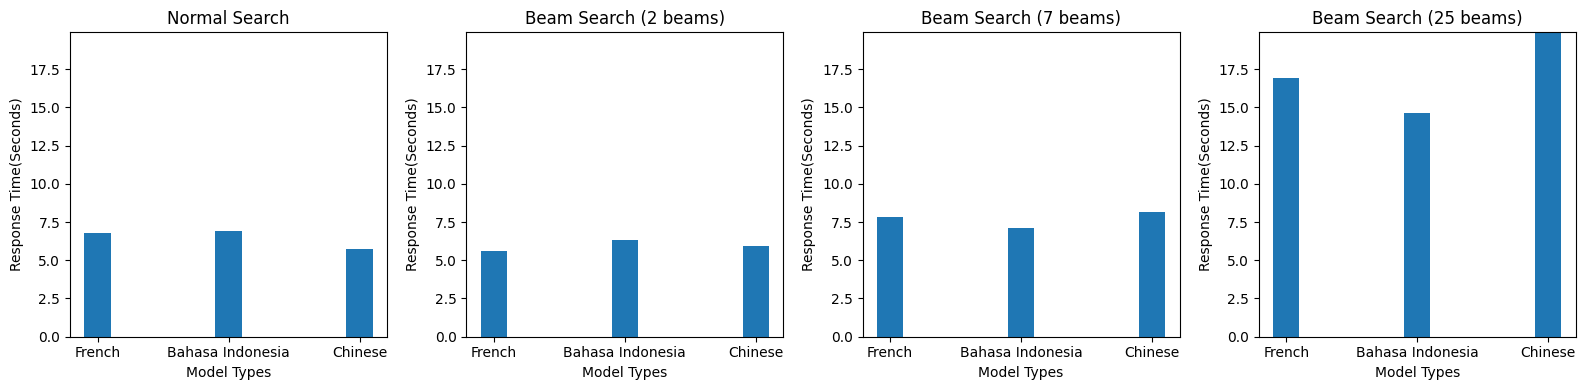

Response Time for French normal search: 6.778929233551025 seconds
Response Time for Indonesian normal search: 6.902743816375732 seconds
Response Time for Chinese normal search: 5.751516342163086 seconds

Response Time for French two beam search: 5.607549428939819 seconds
Response Time for Indonesian two beam search: 6.298314094543457 seconds
Response Time for Chinese two beam search: 5.906911373138428 seconds

Response Time for French seven beam search: 7.8302507400512695 seconds
Response Time for Indonesian seven beam search: 7.134466171264648 seconds
Response Time for Chinese seven beam search: 8.123948812484741 seconds

Response Time for French twenty five beam search: 16.9194016456604 seconds
Response Time for Indonesian twenty five beam search: 14.639896392822266 seconds
Response Time for Chinese twenty five beam search: 19.901201486587524 seconds


In [123]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration
model_types = ['French', 'Bahasa Indonesia', 'Chinese']
values = np.array([[response_time_MarianMTFrench_normalSearch, response_time_MarianMTFrench_twoBeam, response_time_MarianMTFrench_sevenBeam, response_time_MarianMTFrench_twentyFiveBeam], [response_time_MarianMTIndonesian_normalSearch, response_time_MarianMTIndonesian_twoBeam, response_time_MarianMTIndonesian_sevenBeam, response_time_MarianMTIndonesian_twentyFiveBeam], [response_time_MarianMTChinese_normalSearch, response_time_MarianMTChinese_twoBeam, response_time_MarianMTChinese_sevenBeam, response_time_MarianMTChinese_twentyFiveBeam]])

# Setting up positions for bars
bar_width = 0.2
bar_positions = np.arange(len(model_types))

# Define different labels for each graph
labels_list = ['Normal Search', 'Beam Search (2 beams)', 'Beam Search (7 beams)', 'Beam Search (25 beams)']

# Transpose the values array to match the correct shape
graph_values = values.T.tolist()

# Calculate the maximum value among all data points
max_value = np.max(values)

# Create a figure with a single row and four columns
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Plotting each bar graph
for i, ax in enumerate(axs):
    ax.bar(bar_positions, graph_values[i], bar_width, label=labels_list[i])
    ax.set_xlabel('Model Types')
    ax.set_ylabel('Response Time(Seconds)')
    ax.set_title(labels_list[i])

    # Adding x-axis ticks and labels
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(model_types)

    # Set a common y-axis range
    ax.set_ylim(0, max_value)

    # Adding legend
    #ax.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

print(f"Response Time for French normal search: {response_time_MarianMTFrench_normalSearch} seconds")
print(f"Response Time for Indonesian normal search: {response_time_MarianMTIndonesian_normalSearch} seconds")
print(f"Response Time for Chinese normal search: {response_time_MarianMTChinese_normalSearch} seconds")

print("")
print(f"Response Time for French two beam search: {response_time_MarianMTFrench_twoBeam} seconds")
print(f"Response Time for Indonesian two beam search: {response_time_MarianMTIndonesian_twoBeam} seconds")
print(f"Response Time for Chinese two beam search: {response_time_MarianMTChinese_twoBeam} seconds")

print("")
print(f"Response Time for French seven beam search: {response_time_MarianMTFrench_sevenBeam} seconds")
print(f"Response Time for Indonesian seven beam search: {response_time_MarianMTIndonesian_sevenBeam} seconds")
print(f"Response Time for Chinese seven beam search: {response_time_MarianMTChinese_sevenBeam} seconds")

print("")
print(f"Response Time for French twenty five beam search: {response_time_MarianMTFrench_twentyFiveBeam} seconds")
print(f"Response Time for Indonesian twenty five beam search: {response_time_MarianMTIndonesian_twentyFiveBeam} seconds")
print(f"Response Time for Chinese twenty five beam search: {response_time_MarianMTChinese_twentyFiveBeam} seconds")

<h3><b>Comparison of Memory Usage for Normal, 2 , 7 and 25 beam search for each model type (Machine Translation)</b><h3>

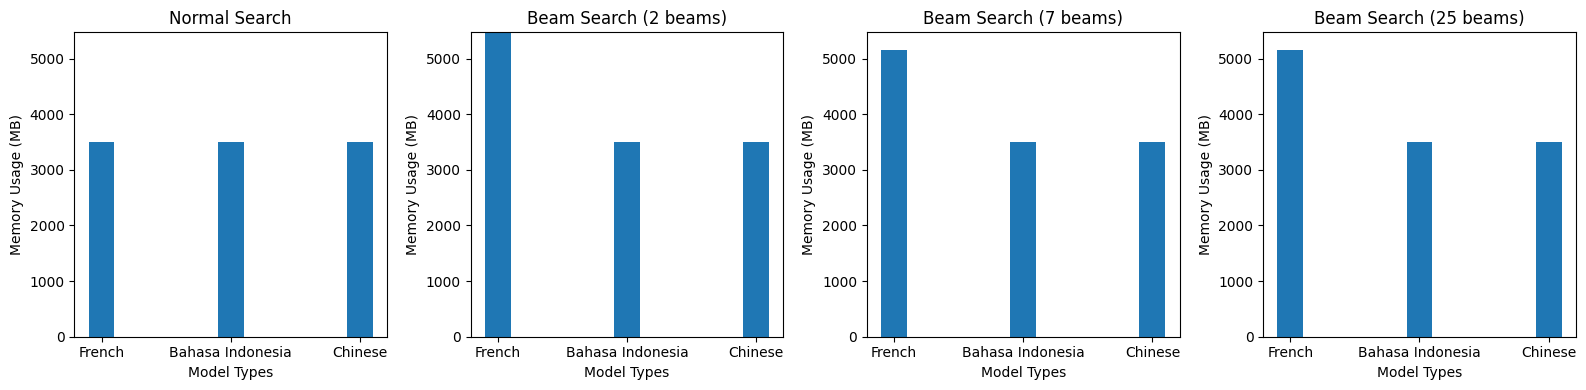

Memory Usage for French translation normal search: 3493.29MB
Memory Usage for Indonesian translation normal search: 3493.3MB
Memory Usage for Chinese translation normal search: 3493.3MB

Memory Usage for French translation two beam search: 5470.87MB
Memory Usage for Indonesian translation two beam search: 3493.29MB
Memory Usage for Chinese translation two beam search: 3493.3MB

Memory Usage for French translation seven beam search: 5154.62MB
Memory Usage for Indonesian translation seven beam search: 3493.3MB
Memory Usage for Chinese translation seven beam search: 3493.3MB

Memory Usage for French translation twenty five beam search: 5154.63MB
Memory Usage for Indonesian translation twenty five beam search: 3493.3MB
Memory Usage for Chinese translation twenty five beam search: 3493.3MB


In [124]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration
model_types = ['French', 'Bahasa Indonesia', 'Chinese']
values = np.array([[marianMTFrench_mNormal, marianMTFrench_m2, marianMTFrench_m7, marianMTFrench_m25], [marianMTIndonesian_mNormal, marianMTIndonesian_m2, marianMTIndonesian_m7, marianMTIndonesian_m25], [marianMTChinese_mNormal, marianMTChinese_m2, marianMTChinese_m7, marianMTChinese_m25]])

# Setting up positions for bars
bar_width = 0.2
bar_positions = np.arange(len(model_types))

# Define different labels for each graph
labels_list = ['Normal Search', 'Beam Search (2 beams)', 'Beam Search (7 beams)', 'Beam Search (25 beams)']

# Transpose the values array to match the correct shape
graph_values = values.T.tolist()

# Calculate the maximum value among all data points
max_value = np.max(values)

# Create a figure with a single row and four columns
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Plotting each bar graph
for i, ax in enumerate(axs):
    ax.bar(bar_positions, graph_values[i], bar_width, label=labels_list[i])
    ax.set_xlabel('Model Types')
    ax.set_ylabel('Memory Usage (MB)')
    ax.set_title(labels_list[i])

    # Adding x-axis ticks and labels
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(model_types)

    # Set a common y-axis range
    ax.set_ylim(0, max_value)

    # Adding legend
    #ax.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

print(f"Memory Usage for French translation normal search: {marianMTFrench_mNormal}MB")
print(f"Memory Usage for Indonesian translation normal search: {marianMTIndonesian_mNormal}MB")
print(f"Memory Usage for Chinese translation normal search: {marianMTChinese_mNormal}MB")

print("")
print(f"Memory Usage for French translation two beam search: {marianMTFrench_m2}MB")
print(f"Memory Usage for Indonesian translation two beam search: {marianMTIndonesian_m2}MB")
print(f"Memory Usage for Chinese translation two beam search: {marianMTChinese_m2}MB")

print("")
print(f"Memory Usage for French translation seven beam search: {marianMTFrench_m7}MB")
print(f"Memory Usage for Indonesian translation seven beam search: {marianMTIndonesian_m7}MB")
print(f"Memory Usage for Chinese translation seven beam search: {marianMTChinese_m7}MB")

print("")
print(f"Memory Usage for French translation twenty five beam search: {marianMTFrench_m25}MB")
print(f"Memory Usage for Indonesian translation twenty five beam search: {marianMTIndonesian_m25}MB")
print(f"Memory Usage for Chinese translation twenty five beam search: {marianMTChinese_m25}MB")

# <b>Results (Generated And Translated Text)</b>

## <h3><b>Generated Text Results Comparison (Creative)</b><h3>

<h3><b>Generated text results GPT2 (creative)</b><h3>

In [125]:
import pandas as pd

# Sample data
data = {
    'Beam Search': ["Normal", 2, 7, 25],
    'Generated Text': [
         generated_text_gpt2_normalSearch,
         generated_text_gpt2_twoBeam,
        generated_text_gpt2_sevenBeam,
        generated_text_gpt2_twentyFiveBeam
    ],
    'Response Time(s)': [f"{response_time_gpt2_normalSearch:.2f}", f"{response_time_gpt2_twoBeam:.2f}", f"{response_time_gpt2_sevenBeam:.2f}", f"{response_time_gpt2_twentyFiveBeam:.2f}"],
    'Memory Usage(MB)': [gpt2_mNormal, gpt2_m2, gpt2_m7, gpt2_m25]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

,Beam Search,Generated Text,Response Time(s),Memory Usage(MB)
0,Normal,"Hello, my dog is cute and I love him. I'm not ...",10.15,3497.43
1,2,"Hello, my dog is cute and I love him. I'm not ...",21.18,3503.12
2,7,"Hello, my dog is cute and I love him so much. ...",20.99,3503.24
3,25,"Hello, my dog is cute and I can't wait to see ...",27.78,3503.24


<h3><b>Generated text results DistilGPT-2 (creative)</b><h3>

In [126]:
import pandas as pd

# Sample data
data = {
    'Beam Search': ["Normal", 2, 7, 25],
    'Generated Text': [
         generated_text_distilgpt2_normalSearch,
         generated_text_distilgpt2_twoBeam,
        generated_text_distilgpt2_sevenBeam,
        generated_text_distilgpt2_twentyFiveBeam
    ],
    'Response Time(s)': [f"{response_time_distilgpt2_normalSearch:.2f}", f"{response_time_distilgpt2_twoBeam:.2f}", f"{response_time_distilgpt2_sevenBeam:.2f}", f"{response_time_distilgpt2_twentyFiveBeam:.2f}"],
    'Memory Usage(MB)': [distilgpt2_mNormal, distilgpt2_m2, distilgpt2_m7, distilgpt2_m25]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

,Beam Search,Generated Text,Response Time(s),Memory Usage(MB)
0,Normal,"Hello, my dog is cute and I love him. I'm so h...",1.47,3501.45
1,2,"Hello, my dog is cute and I love him.\n\nI lov...",2.96,3496.43
2,7,"Hello, my dog is cute and I love to play with ...",7.36,3498.45
3,25,"Hello, my dog is cute and I love to play with ...",9.68,3498.43


<h3><b>Generated text results BART (creative)</b><h3>

In [127]:
import pandas as pd

# Sample data
data = {
    'Beam Search': ["Normal", 2, 7, 25],
    'Generated Text': [
         generated_text_bart_normalSearch,
         generated_text_bart_twoBeam,
        generated_text_bart_sevenBeam,
        generated_text_bart_twentyFiveBeam
    ],
    'Response Time(s)': [f"{response_time_bart_normalSearch:.2f}", f"{response_time_bart_twoBeam:.2f}", f"{response_time_bart_sevenBeam:.2f}", f"{response_time_bart_twentyFiveBeam:.2f}"],
    'Memory Usage(MB)': [bart_mNormal, bart_m2, bart_m7, bart_m25]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

,Beam Search,Generated Text,Response Time(s),Memory Usage(MB)
0,Normal,"Hello, my dog is cute and cute. Hello, I'm a d...",7.26,6051.31
1,2,"Hello, my dog is cute and cute. Hello, I have ...",14.34,4795.48
2,7,"Hello, my dog is cute and I love him. Here's h...",19.40,6046.93
3,25,"Hello, my dog is cute and I love him. Here's h...",31.53,5864.61


## <h3><b>Generated Text Results Comparison (Scientific)</b><h3>

<h3><b>Generated text results GPT2 (scientific)</b><h3>

In [128]:
import pandas as pd

# Sample data
data = {
    'Beam Search': ["Normal", 2, 7, 25],
    'Generated Text': [
         generated_text_gpt2_normalSearch_scientific,
         generated_text_gpt2_twoBeam_scientific,
        generated_text_gpt2_sevenBeam_scientific,
        generated_text_gpt2_twentyFiveBeam_scientific
    ],
    'Response Time(s)': [f"{response_time_gpt2_normalSearch_scientific:.2f}", f"{response_time_gpt2_twoBeam_scientific:.2f}", f"{response_time_gpt2_sevenBeam_scientific:.2f}", f"{response_time_gpt2_twentyFiveBeam_scientific:.2f}"],
    'Memory Usage(MB)': [gpt2_mNormal_scientific, gpt2_m2_scientific, gpt2_m7_scientific, gpt2_m25_scientific]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

,Beam Search,Generated Text,Response Time(s),Memory Usage(MB)
0,Normal,"In the world of Artificial Intelligence, there...",7.08,3504.41
1,2,"In the world of Artificial Intelligence, there...",13.61,3503.39
2,7,"In the world of Artificial Intelligence, there...",17.44,3503.41
3,25,"In the world of Artificial Intelligence, there...",32.80,3503.41


<h3><b>Generated text results DistilGPT-2 (scientific)</b><h3>

In [129]:
import pandas as pd

# Sample data
data = {
    'Beam Search': ["Normal", 2, 7, 25],
    'Generated Text': [
         generated_text_distilgpt2_normalSearch_scientific,
         generated_text_distilgpt2_twoBeam_scientific,
        generated_text_distilgpt2_sevenBeam_scientific,
        generated_text_distilgpt2_twentyFiveBeam_scientific
    ],
    'Response Time(s)': [f"{response_time_distilgpt2_normalSearch_scientific:.2f}", f"{response_time_distilgpt2_twoBeam_scientific:.2f}", f"{response_time_distilgpt2_sevenBeam_scientific:.2f}", f"{response_time_distilgpt2_twentyFiveBeam_scientific:.2f}"],
    'Memory Usage(MB)': [distilgpt2_mNormal_scientific, distilgpt2_m2_scientific, distilgpt2_m7_scientific, distilgpt2_m25_scientific]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

,Beam Search,Generated Text,Response Time(s),Memory Usage(MB)
0,Normal,"In the world of Artificial Intelligence, we ha...",4.95,3504.45
1,2,"In the world of Artificial Intelligence, we ha...",7.08,3503.44
2,7,"In the world of Artificial Intelligence, it’s ...",10.58,3504.42
3,25,"In the world of Artificial Intelligence, artif...",20.31,3504.44


<h3><b>Generated text results BART (scientific)</b><h3>

In [130]:
import pandas as pd

# Sample data
data = {
    'Beam Search': ["Normal", 2, 7, 25],
    'Generated Text': [
         generated_text_bart_normalSearch_scientific,
         generated_text_bart_twoBeam_scientific,
        generated_text_bart_sevenBeam_scientific,
        generated_text_bart_twentyFiveBeam_scientific
    ],
    'Response Time(s)': [f"{response_time_bart_normalSearch_scientific:.2f}", f"{response_time_bart_twoBeam_scientific:.2f}", f"{response_time_bart_sevenBeam_scientific:.2f}", f"{response_time_bart_twentyFiveBeam_scientific:.2f}"],
    'Memory Usage(MB)': [bart_mNormal_scientific, bart_m2_scientific, bart_m7_scientific, bart_m25_scientific]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

,Beam Search,Generated Text,Response Time(s),Memory Usage(MB)
0,Normal,"In the world of Artificial Intelligence, we lo...",8.80,6065.07
1,2,"In the world of Artificial Intelligence, we lo...",14.25,4780.36
2,7,"In the world of Artificial Intelligence, we lo...",18.30,6052.73
3,25,"In the world of Artificial Intelligence, there...",33.45,5861.05


<h3><b>GPT-2 Results (scientific)</b><h3>

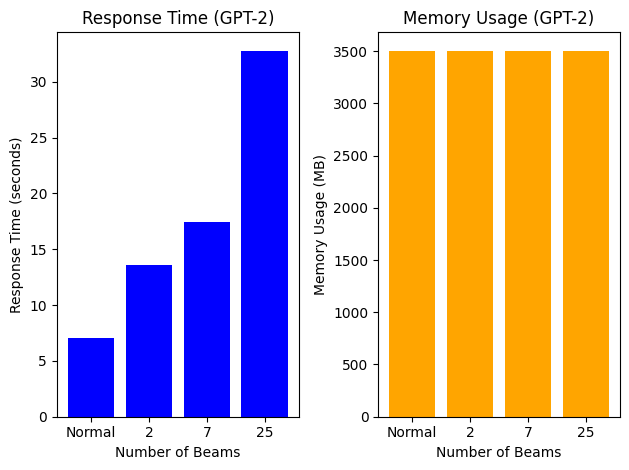

Response Time for GPT2 normal search (scientific): 7.082395792007446 seconds
Response Time for GPT2 two beam search (scientific): 13.605116844177246 seconds
Response Time for GPT2 seven beam search (scientific): 17.4373140335083 seconds
Response Time for GPT2 twenty-five beam search (scientific): 32.79523944854736 seconds

Memory Usage for GPT2 normal search (scientific): 3504.41MB
Memory Usage for GPT2 two beam search (scientific): 3503.39MB
Memory Usage for GPT2 seven beam search (scientific): 3503.41MB
Memory Usage for GPT2 twenty-five beam search (scientific): 3503.41MB


In [131]:
import matplotlib.pyplot as plt

# put the memory usage of using one beam to float variable
gpt2_m2_scientific = float(f"{max(memory_used_gpt2_twoBeam_scientific):.2f}")

# put the memory usage of using seven beams to float variable
gpt2_m7_scientific = float(f"{max(memory_used_gpt2_sevenBeam_scientific):.2f}")

# put the memory usage of using twenty-five beam to float variable
gpt2_m25_scientific = float(f"{max(memory_used_gpt2_twentyFiveBeam_scientific):.2f}")

# put the memory usage of normal search to float variable
gpt2_mNormal_scientific = float(f"{max(memory_used_gpt2_normalSearch_scientific):.2f}")

# Sample data for the first graph
num_beams_1 = ["Normal","2","7","25"]
response_time = [response_time_gpt2_normalSearch_scientific,response_time_gpt2_twoBeam_scientific,response_time_gpt2_sevenBeam_scientific,response_time_gpt2_twentyFiveBeam_scientific]  # in seconds

# Sample data for the second graph
num_beams_2 = ["Normal","2","7","25"]
memory_usage = [gpt2_mNormal_scientific,gpt2_m2_scientific,gpt2_m7_scientific,gpt2_m25_scientific]  # in mb

# Create two subplots side by side
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.bar(num_beams_1, response_time, color='blue')
plt.xlabel('Number of Beams')
plt.ylabel('Response Time (seconds)')
plt.title('Response Time (GPT-2)')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(num_beams_2, memory_usage, color='orange')
plt.xlabel('Number of Beams')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage (GPT-2)')

# Adjust layout for better visualization
plt.tight_layout()

# Display the graphs
plt.show()

print(f"Response Time for GPT2 normal search (scientific): {response_time_gpt2_normalSearch_scientific} seconds")
print(f"Response Time for GPT2 two beam search (scientific): {response_time_gpt2_twoBeam_scientific} seconds")
print(f"Response Time for GPT2 seven beam search (scientific): {response_time_gpt2_sevenBeam_scientific} seconds")
print(f"Response Time for GPT2 twenty-five beam search (scientific): {response_time_gpt2_twentyFiveBeam_scientific} seconds")

print("")

print(f"Memory Usage for GPT2 normal search (scientific): {gpt2_mNormal_scientific}MB")
print(f"Memory Usage for GPT2 two beam search (scientific): {gpt2_m2_scientific}MB")
print(f"Memory Usage for GPT2 seven beam search (scientific): {gpt2_m7_scientific}MB")
print(f"Memory Usage for GPT2 twenty-five beam search (scientific): {gpt2_m25_scientific}MB")

<h3><b>DistilGPT-2 Results (scientific)</b><h3>

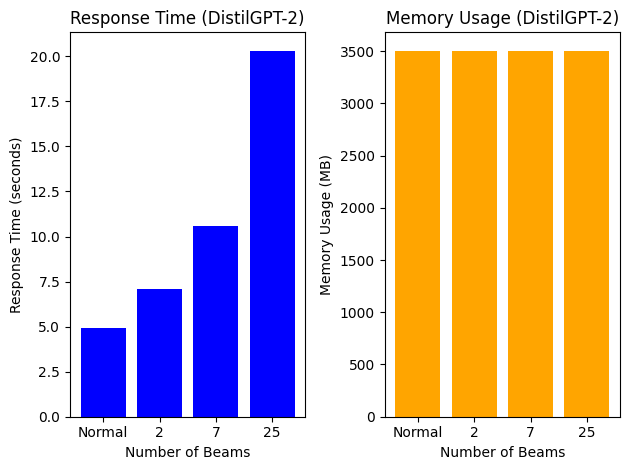

Response Time for DistilGPT-2 normal search (scientific): 4.950746774673462 seconds
Response Time for DistilGPT-2 two beam search (scientific): 7.079152584075928 seconds
Response Time for DistilGPT-2 seven beam search (scientific): 10.583862543106079 seconds
Response Time for DistilGPT-2 twenty-five beam search (scientific): 20.3136248588562 seconds

Memory Usage for DistilGPT-2 normal search (scientific): 3504.45MB
Memory Usage for DistilGPT-2 two beam search (scientific): 3503.44MB
Memory Usage for DistilGPT-2 seven beam search (scientific): 3504.42MB
Memory Usage for DistilGPT-2 twenty-five beam search (scientific): 3504.44MB


In [132]:
import matplotlib.pyplot as plt

# put the memory usage of using one beam to float variable
distilgpt2_m2_scientific = float(f"{max(memory_used_distilgpt2_twoBeam_scientific):.2f}")

# put the memory usage of using seven beams to float variable
distilgpt2_m7_scientific = float(f"{max(memory_used_distilgpt2_sevenBeam_scientific):.2f}")

# put the memory usage of using twenty-five beam to float variable
distilgpt2_m25_scientific = float(f"{max(memory_used_distilgpt2_twentyFiveBeam_scientific):.2f}")

# put the memory usage of normal search to float variable
distilgpt2_mNormal_scientific = float(f"{max(memory_used_distilgpt2_normalSearch_scientific):.2f}")

# Sample data for the first graph
num_beams_1 = ["Normal","2","7","25"]
response_time = [response_time_distilgpt2_normalSearch_scientific,response_time_distilgpt2_twoBeam_scientific,response_time_distilgpt2_sevenBeam_scientific,response_time_distilgpt2_twentyFiveBeam_scientific]  # in seconds

# Sample data for the second graph
num_beams_2 = ["Normal","2","7","25"]
memory_usage = [distilgpt2_mNormal_scientific,distilgpt2_m2_scientific,distilgpt2_m7_scientific,distilgpt2_m25_scientific]  # in mb

# Create two subplots side by side
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.bar(num_beams_1, response_time, color='blue')
plt.xlabel('Number of Beams')
plt.ylabel('Response Time (seconds)')
plt.title('Response Time (DistilGPT-2)')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(num_beams_2, memory_usage, color='orange')
plt.xlabel('Number of Beams')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage (DistilGPT-2)')

# Adjust layout for better visualization
plt.tight_layout()

# Display the graphs
plt.show()

print(f"Response Time for DistilGPT-2 normal search (scientific): {response_time_distilgpt2_normalSearch_scientific} seconds")
print(f"Response Time for DistilGPT-2 two beam search (scientific): {response_time_distilgpt2_twoBeam_scientific} seconds")
print(f"Response Time for DistilGPT-2 seven beam search (scientific): {response_time_distilgpt2_sevenBeam_scientific} seconds")
print(f"Response Time for DistilGPT-2 twenty-five beam search (scientific): {response_time_distilgpt2_twentyFiveBeam_scientific} seconds")

print("")

print(f"Memory Usage for DistilGPT-2 normal search (scientific): {distilgpt2_mNormal_scientific}MB")
print(f"Memory Usage for DistilGPT-2 two beam search (scientific): {distilgpt2_m2_scientific}MB")
print(f"Memory Usage for DistilGPT-2 seven beam search (scientific): {distilgpt2_m7_scientific}MB")
print(f"Memory Usage for DistilGPT-2 twenty-five beam search (scientific): {distilgpt2_m25_scientific}MB")

<h3><b>BART Results (scientific)</b><h3>

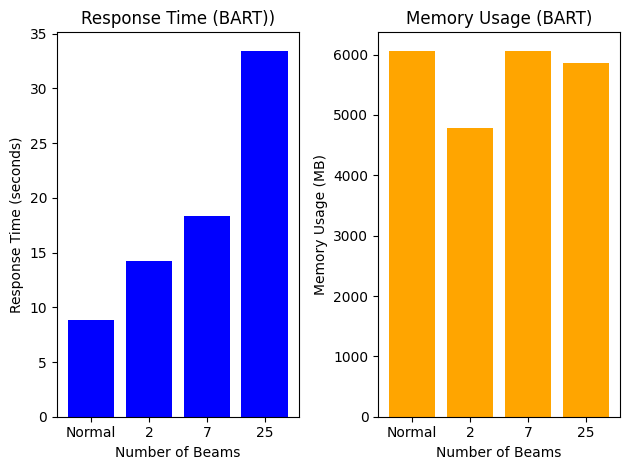

Response Time for BART normal search (scientific): 8.79904818534851 seconds
Response Time for BART two beam search (scientific): 14.249876022338867 seconds
Response Time for BART seven beam search (scientific): 18.30369210243225 seconds
Response Time for BART twenty-five beam search (scientific): 33.45009660720825 seconds

Memory Usage for BART normal search (scientific): 6065.07MB
Memory Usage for BART two beam search (scientific): 4780.36MB
Memory Usage for BART seven beam search (scientific): 6052.73MB
Memory Usage for BART twenty-five beam search (scientific): 5861.05MB


In [133]:
import matplotlib.pyplot as plt

# put the memory usage of using one beam to float variable
bart_m2_scientific = float(f"{max(memory_used_bart_twoBeam_scientific):.2f}")

# put the memory usage of using seven beams to float variable
bart_m7_scientific = float(f"{max(memory_used_bart_sevenBeam_scientific):.2f}")

# put the memory usage of using twenty-five beam to float variable
bart_m25_scientific = float(f"{max(memory_used_bart_twentyFiveBeam_scientific):.2f}")

# put the memory usage of normal search to float variable
bart_mNormal_scientific = float(f"{max(memory_used_bart_normalSearch_scientific):.2f}")

# Sample data for the first graph
num_beams_1 = ["Normal","2","7","25"]
response_time = [response_time_bart_normalSearch_scientific,response_time_bart_twoBeam_scientific,response_time_bart_sevenBeam_scientific,response_time_bart_twentyFiveBeam_scientific]  # in seconds

# Sample data for the second graph
num_beams_2 = ["Normal","2","7","25"]
memory_usage = [bart_mNormal_scientific,bart_m2_scientific,bart_m7_scientific,bart_m25_scientific]  # in mb

# Create two subplots side by side
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.bar(num_beams_1, response_time, color='blue')
plt.xlabel('Number of Beams')
plt.ylabel('Response Time (seconds)')
plt.title('Response Time (BART))')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.bar(num_beams_2, memory_usage, color='orange')
plt.xlabel('Number of Beams')
plt.ylabel('Memory Usage (MB)')
plt.title('Memory Usage (BART)')

# Adjust layout for better visualization
plt.tight_layout()

# Display the graphs
plt.show()


print(f"Response Time for BART normal search (scientific): {response_time_bart_normalSearch_scientific} seconds")
print(f"Response Time for BART two beam search (scientific): {response_time_bart_twoBeam_scientific} seconds")
print(f"Response Time for BART seven beam search (scientific): {response_time_bart_sevenBeam_scientific} seconds")
print(f"Response Time for BART twenty-five beam search (scientific): {response_time_bart_twentyFiveBeam_scientific} seconds")

print("")

print(f"Memory Usage for BART normal search (scientific): {bart_mNormal_scientific}MB")
print(f"Memory Usage for BART two beam search (scientific): {bart_m2_scientific}MB")
print(f"Memory Usage for BART seven beam search (scientific): {bart_m7_scientific}MB")
print(f"Memory Usage for BART twenty-five beam search (scientific): {bart_m25_scientific}MB")

<h3><b>Comparison of Response Time for Normal, 2 , 7 and 25 beam search for each model type (Scientific Text Generation)</b><h3>

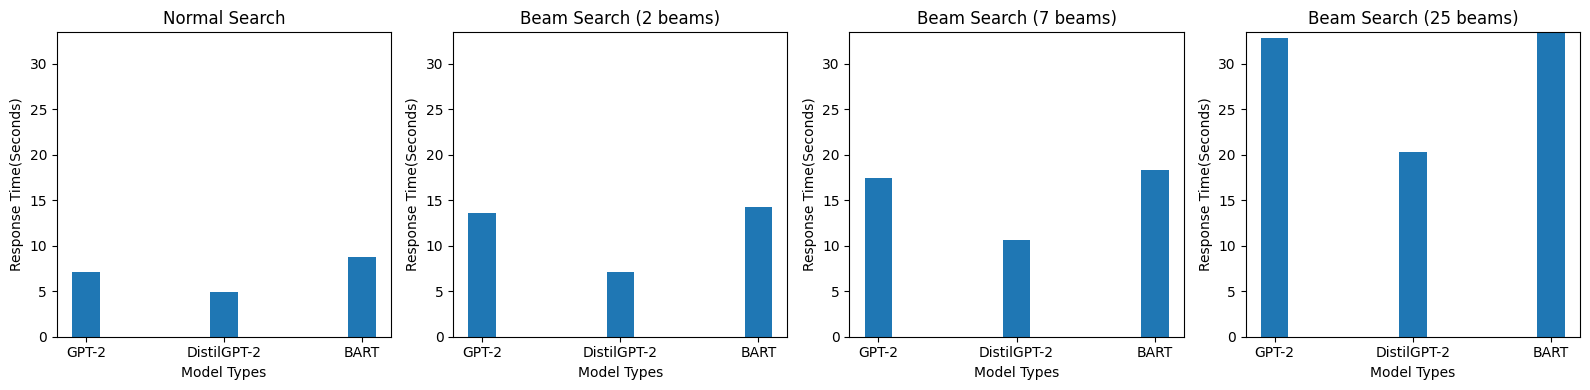

Response Time for GPT2 normal search: 7.082395792007446 seconds
Response Time for DistilGPT2 normal search: 4.950746774673462 seconds
Response Time for BART normal search: 8.79904818534851 seconds

Response Time for GPT2 two beam search: 13.605116844177246 seconds
Response Time for DistilGPT2 two beam search: 7.079152584075928 seconds
Response Time for BART two beam search: 14.249876022338867 seconds

Response Time for GPT2 seven beam search: 17.4373140335083 seconds
Response Time for DistilGPT2 seven beam search: 10.583862543106079 seconds
Response Time for BART seven beam search: 18.30369210243225 seconds

Response Time for GPT2 twenty five beam search: 32.79523944854736 seconds
Response Time for DistilGPT2 twenty five beam search: 20.3136248588562 seconds
Response Time for BART twenty five beam search: 33.45009660720825 seconds


In [134]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration
model_types = ['GPT-2', 'DistilGPT-2', 'BART']
values = np.array([[response_time_gpt2_normalSearch_scientific, response_time_gpt2_twoBeam_scientific, response_time_gpt2_sevenBeam_scientific, response_time_gpt2_twentyFiveBeam_scientific], [response_time_distilgpt2_normalSearch_scientific, response_time_distilgpt2_twoBeam_scientific, response_time_distilgpt2_sevenBeam_scientific, response_time_distilgpt2_twentyFiveBeam_scientific], [response_time_bart_normalSearch_scientific, response_time_bart_twoBeam_scientific, response_time_bart_sevenBeam_scientific, response_time_bart_twentyFiveBeam_scientific]])

# Setting up positions for bars
bar_width = 0.2
bar_positions = np.arange(len(model_types))

# Define different labels for each graph
labels_list = ['Normal Search', 'Beam Search (2 beams)', 'Beam Search (7 beams)', 'Beam Search (25 beams)']

# Transpose the values array to match the correct shape
graph_values = values.T.tolist()

# Calculate the maximum value among all data points
max_value = np.max(values)

# Create a figure with a single row and four columns
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Plotting each bar graph
for i, ax in enumerate(axs):
    ax.bar(bar_positions, graph_values[i], bar_width, label=labels_list[i])
    ax.set_xlabel('Model Types')
    ax.set_ylabel('Response Time(Seconds)')
    ax.set_title(labels_list[i])

    # Adding x-axis ticks and labels
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(model_types)

    # Set a common y-axis range
    ax.set_ylim(0, max_value)

    # Adding legend
    #ax.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

print(f"Response Time for GPT2 normal search: {response_time_gpt2_normalSearch_scientific} seconds")
print(f"Response Time for DistilGPT2 normal search: {response_time_distilgpt2_normalSearch_scientific} seconds")
print(f"Response Time for BART normal search: {response_time_bart_normalSearch_scientific} seconds")

print("")
print(f"Response Time for GPT2 two beam search: {response_time_gpt2_twoBeam_scientific} seconds")
print(f"Response Time for DistilGPT2 two beam search: {response_time_distilgpt2_twoBeam_scientific} seconds")
print(f"Response Time for BART two beam search: { response_time_bart_twoBeam_scientific} seconds")

print("")
print(f"Response Time for GPT2 seven beam search: {response_time_gpt2_sevenBeam_scientific} seconds")
print(f"Response Time for DistilGPT2 seven beam search: {response_time_distilgpt2_sevenBeam_scientific} seconds")
print(f"Response Time for BART seven beam search: {response_time_bart_sevenBeam_scientific} seconds")

print("")
print(f"Response Time for GPT2 twenty five beam search: {response_time_gpt2_twentyFiveBeam_scientific} seconds")
print(f"Response Time for DistilGPT2 twenty five beam search: {response_time_distilgpt2_twentyFiveBeam_scientific} seconds")
print(f"Response Time for BART twenty five beam search: {response_time_bart_twentyFiveBeam_scientific} seconds")

<h3><b>Comparison of Memory Usage for Normal, 2 , 7 and 25 beam search for each model type (Scientific Text Generation)</b><h3>

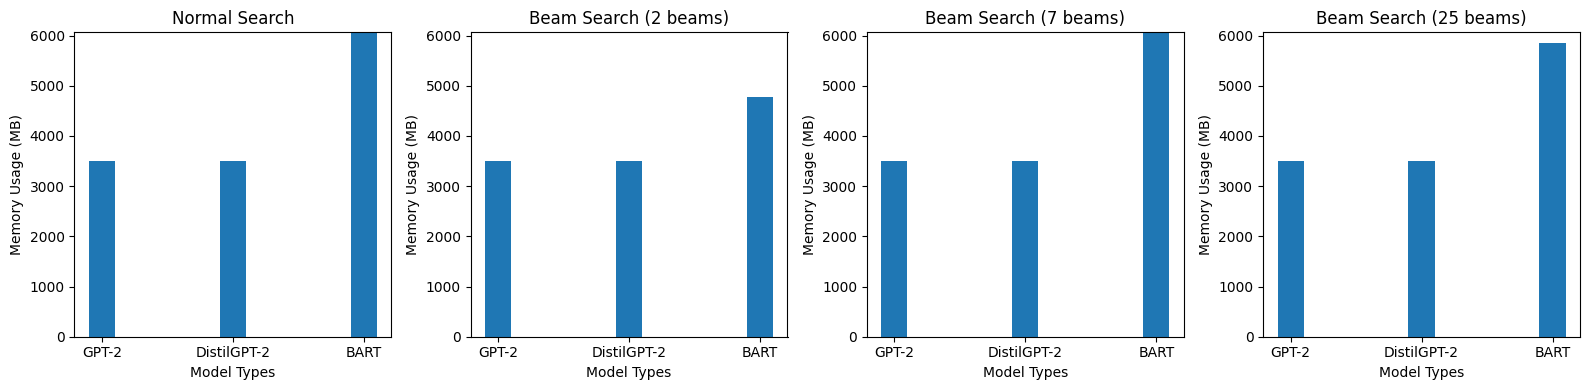

Memory Usage for GPT2 normal search: 3504.41MB
Memory Usage for DistilGPT2 normal search: 3504.45MB
Memory Usage for BART normal search: 6065.07MB

Memory Usage for GPT2 two beam search: 3503.39MB
Memory Usage for DistilGPT2 two beam search: 3503.44MB
Memory Usage for BART two beam search: 4780.36MB

Memory Usage for GPT2 seven beam search: 3503.41MB
Memory Usage for DistilGPT2 seven beam search: 3504.42MB
Memory Usage for BART seven beam search: 6052.73MB

Memory Usage for GPT2 twenty five beam search: 3503.41MB
Memory Usage for DistilGPT2 twenty five beam search: 3504.44MB
Memory Usage for BART twenty five beam search: 5861.05MB


In [135]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration
model_types = ['GPT-2', 'DistilGPT-2', 'BART']
values = np.array([[gpt2_mNormal_scientific, gpt2_m2_scientific, gpt2_m7_scientific, gpt2_m25_scientific], [distilgpt2_mNormal_scientific, distilgpt2_m2_scientific, distilgpt2_m7_scientific, distilgpt2_m25_scientific], [bart_mNormal_scientific, bart_m2_scientific, bart_m7_scientific, bart_m25_scientific]])

# Setting up positions for bars
bar_width = 0.2
bar_positions = np.arange(len(model_types))

# Define different labels for each graph
labels_list = ['Normal Search', 'Beam Search (2 beams)', 'Beam Search (7 beams)', 'Beam Search (25 beams)']

# Transpose the values array to match the correct shape
graph_values = values.T.tolist()

# Calculate the maximum value among all data points
max_value = np.max(values)

# Create a figure with a single row and four columns
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Plotting each bar graph
for i, ax in enumerate(axs):
    ax.bar(bar_positions, graph_values[i], bar_width, label=labels_list[i])
    ax.set_xlabel('Model Types')
    ax.set_ylabel('Memory Usage (MB)')
    ax.set_title(labels_list[i])

    # Adding x-axis ticks and labels
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(model_types)

    # Set a common y-axis range
    ax.set_ylim(0, max_value)

    # Adding legend
    #ax.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

print(f"Memory Usage for GPT2 normal search: {gpt2_mNormal_scientific}MB")
print(f"Memory Usage for DistilGPT2 normal search: {distilgpt2_mNormal_scientific}MB")
print(f"Memory Usage for BART normal search: {bart_mNormal_scientific}MB")

print("")
print(f"Memory Usage for GPT2 two beam search: {gpt2_m2_scientific}MB")
print(f"Memory Usage for DistilGPT2 two beam search: {distilgpt2_m2_scientific}MB")
print(f"Memory Usage for BART two beam search: {bart_m2_scientific}MB")

print("")
print(f"Memory Usage for GPT2 seven beam search: {gpt2_m7_scientific}MB")
print(f"Memory Usage for DistilGPT2 seven beam search: {distilgpt2_m7_scientific}MB")
print(f"Memory Usage for BART seven beam search: {bart_m7_scientific}MB")

print("")
print(f"Memory Usage for GPT2 twenty five beam search: {gpt2_m25_scientific}MB")
print(f"Memory Usage for DistilGPT2 twenty five beam search: {distilgpt2_m25_scientific}MB")
print(f"Memory Usage for BART twenty five beam search: {bart_m25_scientific}MB")

## <h3><b>Translated Text Results</b><h3>

### <h3><b>Translated text results (French)</b><h3>

In [136]:
import pandas as pd

# Sample data
data = {
    'Beam Search': ["Normal", 2, 7, 25],
    'Generated Text': [
         translated_text_MarianMTFrench_normalSearch,
         translated_text_MarianMTFrench_twoBeam,
        translated_text_MarianMTFrench_sevenBeam,
        translated_text_MarianMTFrench_twentyFiveBeam
    ],
    'Response Time(s)': [f"{response_time_MarianMTFrench_normalSearch:.2f}", f"{response_time_MarianMTFrench_twoBeam:.2f}", f"{response_time_MarianMTFrench_sevenBeam:.2f}", f"{response_time_MarianMTFrench_twentyFiveBeam:.2f}"],
    'Memory Usage(MB)': [marianMTFrench_mNormal, marianMTFrench_m2, marianMTFrench_m7, marianMTFrench_m25]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

,Beam Search,Generated Text,Response Time(s),Memory Usage(MB)
0,Normal,Les ordinateurs ont révolutionné la façon dont...,6.78,3493.29
1,2,Les ordinateurs ont révolutionné notre façon d...,5.61,5470.87
2,7,Les ordinateurs ont révolutionné la façon dont...,7.83,5154.62
3,25,Les ordinateurs ont révolutionné la façon dont...,16.92,5154.63


### <h3><b>Translated text results (Bahasa Indonesia)</b><h3>

In [137]:
import pandas as pd

# Sample data
data = {
    'Beam Search': ["Normal", 2, 7, 25],
    'Generated Text': [
         translated_text_MarianMTIndonesian_normalSearch,
         translated_text_MarianMTIndonesian_twoBeam,
        translated_text_MarianMTIndonesian_sevenBeam,
        translated_text_MarianMTIndonesian_twentyFiveBeam
    ],
    'Response Time(s)': [f"{response_time_MarianMTIndonesian_normalSearch:.2f}", f"{response_time_MarianMTIndonesian_twoBeam:.2f}", f"{response_time_MarianMTIndonesian_sevenBeam:.2f}", f"{response_time_MarianMTIndonesian_twentyFiveBeam:.2f}"],
    'Memory Usage(MB)': [marianMTIndonesian_mNormal, marianMTIndonesian_m2, marianMTIndonesian_m7, marianMTIndonesian_m25]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

,Beam Search,Generated Text,Response Time(s),Memory Usage(MB)
0,Normal,komputer telah merevolusi cara kita hidup dan ...,6.90,3493.30
1,2,Komputer telah merevolusi cara kita hidup dan ...,6.30,3493.29
2,7,komputer telah merevolusi cara kita hidup dan ...,7.13,3493.30
3,25,Komputer telah merevolusi cara kita hidup dan ...,14.64,3493.30


### <h3><b>Translated text results (Chinese)</b><h3>

In [138]:
import pandas as pd

# Sample data
data = {
    'Beam Search': ["Normal", 2, 7, 25],
    'Generated Text': [
         translated_text_MarianMTChinese_normalSearch,
         translated_text_MarianMTChinese_twoBeam,
        translated_text_MarianMTChinese_sevenBeam,
        translated_text_MarianMTChinese_twentyFiveBeam
    ],
    'Response Time(s)': [f"{response_time_MarianMTChinese_normalSearch:.2f}", f"{response_time_MarianMTChinese_twoBeam:.2f}", f"{response_time_MarianMTChinese_sevenBeam:.2f}", f"{response_time_MarianMTChinese_twentyFiveBeam:.2f}"],
    'Memory Usage(MB)': [marianMTChinese_mNormal, marianMTChinese_m2, marianMTChinese_m7, marianMTChinese_m25]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

,Beam Search,Generated Text,Response Time(s),Memory Usage(MB)
0,Normal,"计算机改变了我们的生活和工作方式。第一台电子计算机ENIAC(ENIAC)规模庞大,重量近3...",5.75,3493.3
1,2,"计算机已经改变了我们的生活和工作方式。第一台电子计算机,即ENIAC,规模庞大,重量近30吨...",5.91,3493.3
2,7,"计算机改变了我们的生活和工作方式。第一台电子计算机ENIAC(ENIAC)规模庞大,重量近3...",8.12,3493.3
3,25,计算机使我们的生活和工作方式发生了革命性的变化。第一台电子计算机ENIAC(ENIAC)规模...,19.90,3493.3
